# Notebook de implementación

In [3]:
from utils import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.2 MB/s eta 0:00:00
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

## Lectura de los CSVs

In [4]:
# Lectura de los datasets de MELD
file_paths_MELD = ['train/train_sent_emo.csv', 'dev_sent_emo.csv']
df_train_MELD, df_dev_MELD = read_csvs(file_paths_MELD, 'MELD')

# Lectura de los datasets de MOSEI
file_paths_MOSEI = ['Labels/Data_Train_modified.csv', 'Labels/Data_Val_modified.csv', 'Labels/Data_Test_modified.csv']
df_train_MOSEI, df_dev_MOSEI, df_test_MOSEI = read_csvs(file_paths_MOSEI, 'MOSEI')

In [5]:
# Se muestran las dimensiones originales de los dataframes cargados
lista_dfs = [df_train_MELD, df_dev_MELD, df_train_MOSEI, df_dev_MOSEI, df_test_MOSEI]
name_dfs = ['Train MELD', 'Dev MELD', 'Train MOSEI', 'Dev MOSEI', 'Test MOSEI']
shape_dfs(lista_dfs, name_dfs)

Train MELD tiene 9989 filas y 11 columnas
Dev MELD tiene 1109 filas y 11 columnas
Train MOSEI tiene 16274 filas y 12 columnas
Dev MOSEI tiene 1861 filas y 12 columnas
Test MOSEI tiene 4653 filas y 12 columnas


## Limpieza de los Dataframes

In [6]:
# Limpieza de MELD
df_train_MELD_clean = clean_dfs(df_train_MELD, 'MELD', 'train')
df_dev_MELD_clean = clean_dfs(df_dev_MELD, 'MELD', 'dev')

# Limpieza de MOSEI
df_train_MOSEI_clean = clean_dfs(df_train_MOSEI, 'MOSEI', 'train')
df_dev_MOSEI_clean = clean_dfs(df_dev_MOSEI, 'MOSEI', 'train')
df_test_MOSEI_clean = clean_dfs(df_test_MOSEI, 'MOSEI', 'train')

df_train_MOSEI_clean, df_dev_MOSEI_clean, df_test_MOSEI_clean = encode_MOSEI_video_column([df_train_MOSEI_clean, 
                                                                                              df_dev_MOSEI_clean, 
                                                                                              df_test_MOSEI_clean])

## Adecuación y Normalización de los Dataframes

La columna Sentiment se adecuará y normalizará de la siguiente forma:
* Negativo = 0
* Neutral = 1
* Positivo = 2

In [7]:
# Adecuación y normalización de MELD
df_train_MELD_normalized, meld_emotion_scale = normalize_emotion_and_sentiment(df_train_MELD_clean, 'MELD')
df_dev_MELD_normalized, _ = normalize_emotion_and_sentiment(df_dev_MELD_clean, 'MELD')

# Adecuación y normalización de MOSEI
df_train_MOSEI_normalized, _ = normalize_emotion_and_sentiment(df_train_MOSEI_clean, 'MOSEI')
df_dev_MOSEI_normalized, _ = normalize_emotion_and_sentiment(df_dev_MOSEI_clean, 'MOSEI')
df_test_MOSEI_normalized, _ = normalize_emotion_and_sentiment(df_test_MOSEI_clean, 'MOSEI')

Emociones en MELD: {'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'neutral': 4, 'sadness': 5, 'surprise': 6}
Emociones en MELD: {'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'neutral': 4, 'sadness': 5, 'surprise': 6}


## Preprocesar el texto

### Preprocesamiento básico del texto
* Se pone en minúsculas el texto
* Se limpian las palabras repetidas y las onomotopeyas
* Se eliminan los símbolos extraños
* Se expanden las contracciones

In [8]:
# Preprocesamos de forma básica MELD
df_train_MELD_basic = preprocess_text_column(df_train_MELD_normalized)
df_dev_MELD_basic = preprocess_text_column(df_dev_MELD_normalized)

# Preprocesamos de forma básica MOSEI
df_train_MOSEI_basic = preprocess_text_column(df_train_MOSEI_normalized)
df_dev_MOSEI_basic = preprocess_text_column(df_dev_MOSEI_normalized)
df_test_MOSEI_basic = preprocess_text_column(df_test_MOSEI_normalized)

### Tratamiento de los n-gramas de tipo stopwords

In [9]:
try:
    # Se intenta cargar el fichero json con los n-gramas de tipo stopword
    with open("stopword_ngrams.json", "r", encoding="utf-8") as f:
        stopword_ngrams = set(json.load(f))
    print(f"Se han cargado {len(stopword_ngrams)} n-gramas de tipo stopwords")
except (FileNotFoundError, json.JSONDecodeError):
    # Mensaje de advertencia de que no existe la lista de n-gramas de tipo stopword
    print("No se pudo cargar el fichero. Generando la lista de nuevo...")
    
    # Se listas todos los dataframes disponibles
    dfs_basic = [df_train_MELD_basic, df_dev_MELD_basic, df_train_MOSEI_basic, df_dev_MOSEI_basic, df_test_MOSEI_basic]
    
    # Se crea el corpus de los textos disponibles
    corpus = load_texts_from_dfs(dfs_basic)
    
    # Se extraen los n-gramas de tipo stopword a partir del corpus
    ngrams = extract_stopword_ngrams_corpus(corpus)
    
    # Se guardan los n-gramas de tipo stopword en un fichero json
    save_stopword_ngrams_corpus(ngrams)
    stopword_ngrams = set(ngrams)

    # Mensaje de advertencia de que no existe la lista de n-gramas de tipo stopword
    print("La lista de n-gramas de tipo stopword ha sido generada y guardada")

Se han cargado 15381 n-gramas de tipo stopwords


In [10]:
# Se aplica la limpieza de n-gramas de tipo stopword a los dataframes de MELD
df_train_MELD_ngrams = remove_stopword_ngrams_from_dfs(df_train_MELD_basic, stopword_ngrams, 6, 'Train MELD')
df_dev_MELD_ngrams = remove_stopword_ngrams_from_dfs(df_dev_MELD_basic, stopword_ngrams, 6, 'Dev MELD')

# Se aplica la limpieza de n-gramas de tipo stopword a los dataframes de MOSEI
df_train_MOSEI_ngrams = remove_stopword_ngrams_from_dfs(df_train_MOSEI_basic, stopword_ngrams, 6, 'Train MOSEI')
df_dev_MOSEI_ngrams = remove_stopword_ngrams_from_dfs(df_dev_MOSEI_basic, stopword_ngrams, 6, 'Dev MOSEI')
df_test_MOSEI_ngrams = remove_stopword_ngrams_from_dfs(df_test_MOSEI_basic, stopword_ngrams, 6, 'Test MOSEI')

Se han eliminado 144 filas con texto vacío. Train MELD ahora tiene un shape (9845, 9)
Se han eliminado 22 filas con texto vacío. Dev MELD ahora tiene un shape (1087, 9)
Se han eliminado 14 filas con texto vacío. Train MOSEI ahora tiene un shape (16260, 15)
Se han eliminado 0 filas con texto vacío. Dev MOSEI ahora tiene un shape (1861, 15)
Se han eliminado 3 filas con texto vacío. Test MOSEI ahora tiene un shape (4650, 15)


#### Tranamiento de las stopwords simples

In [11]:
# Se aplica la limpieza de stopword simples a los dataframes de MELD
df_train_MELD_stop = remove_stopwords_single_from_dfs(df_train_MELD_ngrams, 'Train MELD')
df_dev_MELD_stop = remove_stopwords_single_from_dfs(df_dev_MELD_ngrams, 'Dev MELD')

# Se aplica la limpieza de stopword simples a los dataframes de MOSEI
df_train_MOSEI_stop = remove_stopwords_single_from_dfs(df_train_MOSEI_ngrams, 'Train MOSEI')
df_dev_MOSEI_stop = remove_stopwords_single_from_dfs(df_dev_MOSEI_ngrams, 'Dev MOSEI')
df_test_MOSEI_stop = remove_stopwords_single_from_dfs(df_test_MOSEI_ngrams, 'Test MOSEI')

Se han eliminado 316 filas con texto vacío. Train MELD ahora tiene un shape (9529, 9)
Se han eliminado 40 filas con texto vacío. Dev MELD ahora tiene un shape (1047, 9)
Se han eliminado 14 filas con texto vacío. Train MOSEI ahora tiene un shape (16246, 15)
Se han eliminado 1 filas con texto vacío. Dev MOSEI ahora tiene un shape (1860, 15)
Se han eliminado 2 filas con texto vacío. Test MOSEI ahora tiene un shape (4648, 15)


#### Eliminación de frases de 1 palabra

In [12]:
df_train_MELD_stop = filter_short_texts(df_train_MELD_stop, 'Train MELD', min_words = 2)
df_dev_MELD_stop = filter_short_texts(df_dev_MELD_stop, 'Train MELD', min_words = 2)
df_train_MOSEI_stop = filter_short_texts(df_train_MOSEI_stop, 'Train MELD', min_words = 2)
df_dev_MOSEI_stop = filter_short_texts(df_dev_MOSEI_stop, 'Train MELD', min_words = 2)
df_test_MOSEI_stop = filter_short_texts(df_test_MOSEI_stop, 'Train MELD', min_words = 2)

df_train_MELD_stop = df_train_MELD_stop.drop(columns = ['index'])
df_dev_MELD_stop = df_dev_MELD_stop.drop(columns = ['index'])
df_train_MOSEI_stop = df_train_MOSEI_stop.drop(columns = ['index'])
df_dev_MOSEI_stop = df_dev_MOSEI_stop.drop(columns = ['index'])
df_test_MOSEI_stop = df_test_MOSEI_stop.drop(columns = ['index'])

Train MELD pasa de 9529 filas a tener 7452 filas.
Train MELD pasa de 1047 filas a tener 825 filas.
Train MELD pasa de 16246 filas a tener 15915 filas.
Train MELD pasa de 1860 filas a tener 1828 filas.
Train MELD pasa de 4648 filas a tener 4546 filas.


#### Creación de MELD test
Dado que los ficheros de audio de MELD para test están corruptos en el origen (Github), se creará un dataset de test a partir del dataframe de train y se guardará como fichero. 

In [13]:
# Se extrae el df de Test de MELD a partir del df de Train y
# si la división ya existe, se leerá de los ficheros guardados
df_train_MELD_stop, df_test_MELD_stop = get_meld_test(df_train_MELD_stop, 0.1)

# Se muestran las dimensiones de los nuevos dataframes
lista_MELD_dfs = [df_train_MELD_stop, df_test_MELD_stop]
name_MELD_dfs = ['Train MELD', 'Test MELD']
shape_dfs(lista_MELD_dfs, name_MELD_dfs)

Cargando splits ya existentes...
Train MELD tiene 6706 filas y 11 columnas
Test MELD tiene 746 filas y 11 columnas


#### Data Augmentation

In [14]:
# Data Augmentation para MELD
df_train_MELD_augmented = augment_dataframe_balanced(df_train_MELD_stop)

# Data Augmentation para MOSEI
df_train_MOSEI_augmented = augment_dataframe_balanced(df_train_MOSEI_stop)


 Resultado del balanceo:
- Tamaño original del dataset: 6706
- Tamaño después del augmentación: 9351
- Número de muestras por clase antes del balanceo: sentiment
0    2041
1    3117
2    1548
Name: count, dtype: int64
- Número de muestras por clase después del balanceo: sentiment
0    3117
1    3117
2    3117
Name: count, dtype: int64

 Resultado del balanceo:
- Tamaño original del dataset: 15915
- Tamaño después del augmentación: 23778
- Número de muestras por clase antes del balanceo: sentiment
0.0    4578
1.0    3411
2.0    7926
Name: count, dtype: int64
- Número de muestras por clase después del balanceo: sentiment
0.0    7926
1.0    7926
2.0    7926
Name: count, dtype: int64


#### Feature Engeeniring

In [15]:
# Feature Engineering para MELD
df_train_MELD_features = feature_engineering_MELD(df_train_MELD_augmented)
df_dev_MELD_features = feature_engineering_MELD(df_dev_MELD_stop)
df_test_MELD_features = feature_engineering_MELD(df_test_MELD_stop)

# Feature Engineering para MELD
df_train_MOSEI_features = feature_engineering_MOSEI(df_train_MOSEI_augmented)
df_dev_MOSEI_features = feature_engineering_MOSEI(df_dev_MOSEI_stop)
df_test_MOSEI_features = feature_engineering_MOSEI(df_test_MOSEI_stop)

#### Guardado de los dataframes resultantes del preprocesamiento

In [16]:
# Guardado para MELD
df_train_MELD_features.to_csv("MELD_train.csv", index = False)
df_dev_MELD_features.to_csv("MELD_dev.csv", index = False)
df_test_MELD_features.to_csv("MELD_test.csv", index = False)

# Guardado para MOSEI
df_train_MOSEI_features.to_csv("MOSEI_train.csv", index = False)
df_dev_MOSEI_features.to_csv("MOSEI_dev.csv", index = False)
df_test_MOSEI_features.to_csv("MOSEI_test.csv", index = False)

## Preparación de los datos para los modelos

### Reducción de columnas para el entreno

In [17]:
# Reducción del número de columnas para MELD
df_train_MELD_reduced = df_train_MELD_stop.drop(columns = ['video_path'])
df_dev_MELD_reduced = df_dev_MELD_stop.drop(columns = ['video_path'])
df_test_MELD_reduced = df_test_MELD_stop.drop(columns = ['video_path'])

# Reducción del número de columnas para MOSEI
df_train_MOSEI_reduced = df_train_MOSEI_stop.drop(columns = ['video', 'audio_name', 'video_path'])
df_dev_MOSEI_reduced = df_dev_MOSEI_stop.drop(columns = ['video', 'audio_name', 'video_path'])
df_test_MOSEI_reduced = df_test_MOSEI_stop.drop(columns = ['video', 'audio_name', 'video_path'])

### Definición de las features, el texto y las etiquetas de cada dataset

In [18]:
# Features, texto y etiquetas para MELD
features_MELD = ['Emotion', 
                 'duration',  
                 'dialogue_id_norm', 
                 'utterance_id_norm', 
                 'season_norm',
                 'polarity',
                 'subjectivity']
text_train_MELD, labels_train_MELD, features_train_MELD = prepare_text_feature_label_data(df_train_MELD_features, features_MELD)
text_dev_MELD, labels_dev_MELD, features_dev_MELD = prepare_text_feature_label_data(df_dev_MELD_features, features_MELD)
text_test_MELD, labels_test_MELD, features_test_MELD = prepare_text_feature_label_data(df_test_MELD_features, features_MELD)

# Features, texto y etiquetas para MOSEI
features_MOSEI = ['start_time', 
                  'end_time', 
                  'happy', 
                  'sad', 
                  'disgust', 
                  'neutral', 
                  'video_encoded', 
                  'duration', 
                  'intensity', 
                  'dominant_emotion', 
                  'positive_emotions', 
                  'polarity',
                  'subjectivity']
text_train_MOSEI, labels_train_MOSEI, features_train_MOSEI = prepare_text_feature_label_data(df_train_MOSEI_features, features_MOSEI)
text_dev_MOSEI, labels_dev_MOSEI, features_dev_MOSEI = prepare_text_feature_label_data(df_dev_MOSEI_features, features_MOSEI)
text_test_MOSEI, labels_test_MOSEI, features_test_MOSEI = prepare_text_feature_label_data(df_test_MOSEI_features, features_MOSEI)

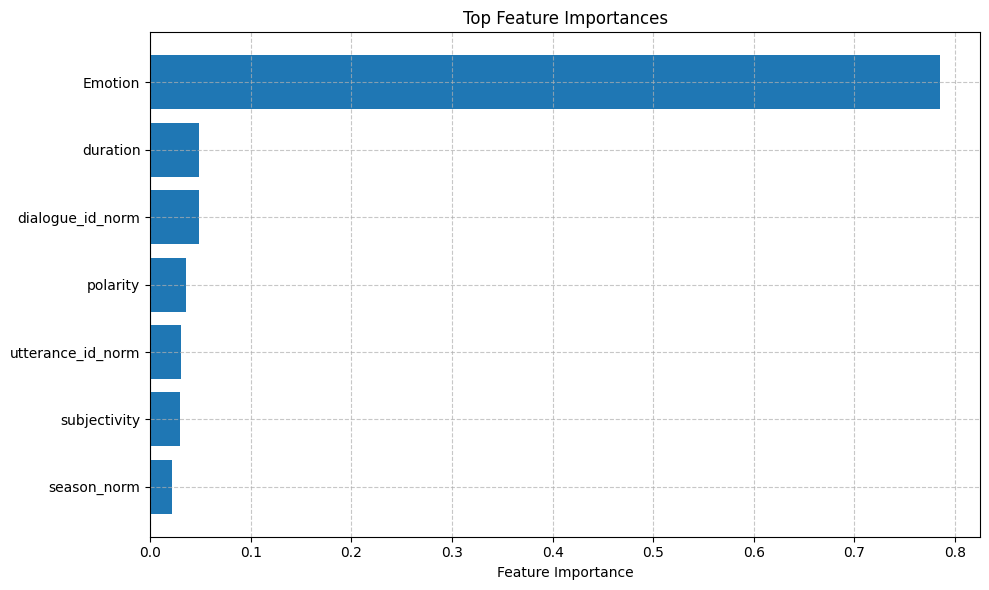

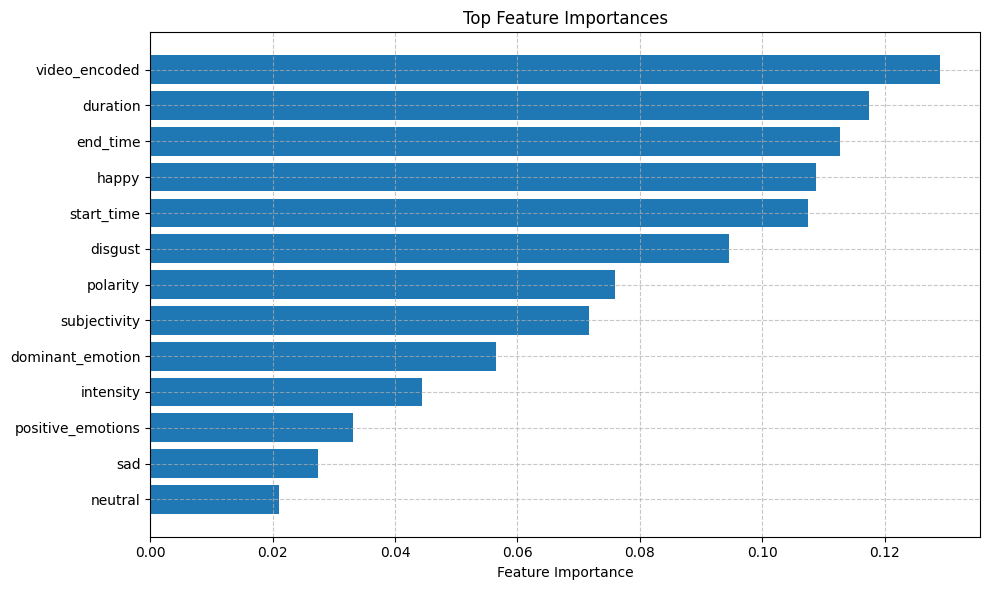

In [19]:
# Feature importance en MELD
plot_feature_importance(features_train_MELD, labels_train_MELD, feature_names = features_MELD, top_n = len(features_MELD))
 
# Feature importance en MOSEI
plot_feature_importance(features_train_MOSEI, labels_train_MOSEI, feature_names = features_MOSEI, top_n = len(features_MOSEI))

### Definición de los datasets finales
Los datasets finales se crearán mezclando las siguientes posibilidades:
1.  Tokenizer: bert, roberta, xlnet, bertweet o twitter-roberta
2.  Dataset: MELD o MOSEI
3.  Split: train, dev o test

In [20]:
# Se calcula el max_len de cada combinación de dataset y modelo
# Primero, MELD
max_len_MELD_BERT = measure_max_len(tokenizers["bert"], [text_train_MELD, text_dev_MELD, text_test_MELD], 'MELD', 'BERT')
max_len_MELD_ROBERTA = measure_max_len(tokenizers["roberta"], [text_train_MELD, text_dev_MELD, text_test_MELD], 'MELD', 'ROBERTA')
max_length_MELD_XLNET = measure_max_len(tokenizers["xlnet"], [text_train_MELD, text_dev_MELD, text_test_MELD], 'MELD', 'XLNET')
max_len_MELD_BERTWEET = measure_max_len(tokenizers["bertweet"], [text_train_MELD, text_dev_MELD, text_test_MELD], 'MELD', 'bertweet')
max_len_MELD_ROBERTA_TWEET = measure_max_len(tokenizers["twitter-roberta"], [text_train_MELD, text_dev_MELD, text_test_MELD], 'MELD', 'ROBERTA twitter')

# Segundo, MOSEI
max_len_MOSEI_BERT = measure_max_len(tokenizers["bert"], [text_train_MOSEI, text_dev_MOSEI, text_test_MOSEI], 'MOSEI', 'BERT')
max_len_MOSEI_ROBERTA = measure_max_len(tokenizers["roberta"], [text_train_MOSEI, text_dev_MOSEI, text_test_MOSEI], 'MOSEI', 'ROBERTA')
max_len_MOSEI_XLNET = measure_max_len(tokenizers["xlnet"], [text_train_MOSEI, text_dev_MOSEI, text_test_MOSEI], 'MOSEI', 'XLNET')
max_len_MOSEI_BERTWEET = measure_max_len(tokenizers["bertweet"], [text_train_MOSEI, text_dev_MOSEI, text_test_MOSEI], 'MOSEI', 'bertweet')
max_len_MOSEI_ROBERTA_TWEET = measure_max_len(tokenizers["twitter-roberta"], [text_train_MOSEI, text_dev_MOSEI, text_test_MOSEI], 'MOSEI', 'ROBERTA twitter')

Max token length for MELD: 36
Model BERT max token length: 512
Max token length for MELD: 37
Model ROBERTA max token length: 512
Max token length for MELD: 47
Model XLNET max token length: 1000000000000000019884624838656
Max token length for MELD: 37
Model bertweet max token length: 128
Max token length for MELD: 37
Model ROBERTA twitter max token length: 1000000000000000019884624838656
Max token length for MOSEI: 167
Model BERT max token length: 512
Max token length for MOSEI: 180
Model ROBERTA max token length: 512
Max token length for MOSEI: 189
Model XLNET max token length: 1000000000000000019884624838656
Max token length for MOSEI: 163
Model bertweet max token length: 128
Max token length for MOSEI: 180
Model ROBERTA twitter max token length: 1000000000000000019884624838656


In [21]:
# Se definen todos los datasets posibles

''' BERT '''
# MELD
train_dataset_MELD_BERT = SentimentDataset(text_train_MELD, features_train_MELD, labels_train_MELD, tokenizers["bert"], max_len_MELD_BERT)
dev_dataset_MELD_BERT = SentimentDataset(text_dev_MELD, features_dev_MELD, labels_dev_MELD, tokenizers["bert"], max_len_MELD_BERT)
test_dataset_MELD_BERT = SentimentDataset(text_test_MELD, features_test_MELD, labels_test_MELD, tokenizers["bert"], max_len_MELD_BERT)

# MOSEI
train_dataset_MOSEI_BERT = SentimentDataset(text_train_MOSEI, features_train_MOSEI, labels_train_MOSEI, tokenizers["bert"], max_len_MOSEI_BERT)
dev_dataset_MOSEI_BERT = SentimentDataset(text_dev_MOSEI, features_dev_MOSEI, labels_dev_MOSEI, tokenizers["bert"], max_len_MOSEI_BERT)
test_dataset_MOSEI_BERT = SentimentDataset(text_test_MOSEI, features_test_MOSEI, labels_test_MOSEI, tokenizers["bert"], max_len_MOSEI_BERT)

''' ROBERTA '''
# MELD
train_dataset_MELD_ROBERTA = SentimentDataset(text_train_MELD, features_train_MELD, labels_train_MELD, tokenizers["roberta"], max_len_MELD_ROBERTA)
dev_dataset_MELD_ROBERTA = SentimentDataset(text_dev_MELD, features_dev_MELD, labels_dev_MELD, tokenizers["roberta"], max_len_MELD_ROBERTA)
test_dataset_MELD_ROBERTA = SentimentDataset(text_test_MELD, features_test_MELD, labels_test_MELD, tokenizers["roberta"], max_len_MELD_ROBERTA)

# MOSEI
train_dataset_MOSEI_ROBERTA = SentimentDataset(text_train_MOSEI, features_train_MOSEI, labels_train_MOSEI, tokenizers["roberta"], max_len_MOSEI_ROBERTA)
dev_dataset_MOSEI_ROBERTA = SentimentDataset(text_dev_MOSEI, features_dev_MOSEI, labels_dev_MOSEI, tokenizers["roberta"], max_len_MOSEI_ROBERTA)
test_dataset_MOSEI_ROBERTA = SentimentDataset(text_test_MOSEI, features_test_MOSEI, labels_test_MOSEI, tokenizers["roberta"], max_len_MOSEI_ROBERTA)

''' BERTWEET '''
# MELD
train_dataset_MELD_BERTWEET = SentimentDataset(text_train_MELD, features_train_MELD, labels_train_MELD, tokenizers["bertweet"], max_len_MELD_BERTWEET)
dev_dataset_MELD_BERTWEET = SentimentDataset(text_dev_MELD, features_dev_MELD, labels_dev_MELD, tokenizers["bertweet"], max_len_MELD_BERTWEET)
test_dataset_MELD_BERTWEET = SentimentDataset(text_test_MELD, features_test_MELD, labels_test_MELD, tokenizers["bertweet"], max_len_MELD_BERTWEET)

# MOSEI
train_dataset_MOSEI_BERTWEET = SentimentDataset(text_train_MOSEI, features_train_MOSEI, labels_train_MOSEI, tokenizers["bertweet"], max_len_MOSEI_BERTWEET)
dev_dataset_MOSEI_BERTWEET = SentimentDataset(text_dev_MOSEI, features_dev_MOSEI, labels_dev_MOSEI, tokenizers["bertweet"], max_len_MOSEI_BERTWEET)
test_dataset_MOSEI_BERTWEET = SentimentDataset(text_test_MOSEI, features_test_MOSEI, labels_test_MOSEI, tokenizers["bertweet"], max_len_MOSEI_BERTWEET)

''' TWITTER-ROBERTA '''
# MELD
train_dataset_MELD_ROBERTA_TWEET = SentimentDataset(text_train_MELD, features_train_MELD, labels_train_MELD, tokenizers["twitter-roberta"], max_len_MELD_ROBERTA_TWEET)
dev_dataset_MELD_ROBERTA_TWEET = SentimentDataset(text_dev_MELD, features_dev_MELD, labels_dev_MELD, tokenizers["twitter-roberta"], max_len_MELD_ROBERTA_TWEET)
test_dataset_MELD_ROBERTA_TWEET = SentimentDataset(text_test_MELD, features_test_MELD, labels_test_MELD, tokenizers["twitter-roberta"], max_len_MELD_ROBERTA_TWEET)

# MOSEI
train_dataset_MOSEI_ROBERTA_TWEET = SentimentDataset(text_train_MOSEI, features_train_MOSEI, labels_train_MOSEI, tokenizers["twitter-roberta"], max_len_MOSEI_ROBERTA_TWEET)
dev_dataset_MOSEI_ROBERTA_TWEET = SentimentDataset(text_dev_MOSEI, features_dev_MOSEI, labels_dev_MOSEI, tokenizers["twitter-roberta"], max_len_MOSEI_ROBERTA_TWEET)
test_dataset_MOSEI_ROBERTA_TWEET = SentimentDataset(text_test_MOSEI, features_test_MOSEI, labels_test_MOSEI, tokenizers["twitter-roberta"], max_len_MOSEI_ROBERTA_TWEET)

#### Creación de los Dataloaders

In [22]:
# Se definen todos los dataloaders posibles

''' BERT '''
# MELD
train_dataloader_MELD_BERT = DataLoader(train_dataset_MELD_BERT, batch_size = 32, shuffle = True)
dev_dataloader_MELD_BERT = DataLoader(dev_dataset_MELD_BERT, batch_size = 32)
test_dataloader_MELD_BERT = DataLoader(test_dataset_MELD_BERT, batch_size = 32)

# MOSEI
train_dataloader_MOSEI_BERT = DataLoader(train_dataset_MOSEI_BERT, batch_size = 32, shuffle = True)
dev_dataloader_MOSEI_BERT = DataLoader(dev_dataset_MOSEI_BERT, batch_size = 32)
test_dataloader_MOSEI_BERT = DataLoader(test_dataset_MOSEI_BERT, batch_size = 32)

''' ROBERTA '''
# MELD
train_dataloader_MELD_ROBERTA = DataLoader(train_dataset_MELD_ROBERTA, batch_size = 32, shuffle = True)
dev_dataloader_MELD_ROBERTA = DataLoader(dev_dataset_MELD_ROBERTA, batch_size = 32)
test_dataloader_MELD_ROBERTA = DataLoader(test_dataset_MELD_ROBERTA, batch_size = 32)

# MOSEI
train_dataloader_MOSEI_ROBERTA = DataLoader(train_dataset_MOSEI_ROBERTA, batch_size = 32, shuffle = True)
dev_dataloader_MOSEI_ROBERTA = DataLoader(dev_dataset_MOSEI_ROBERTA, batch_size = 32)
test_dataloader_MOSEI_ROBERTA = DataLoader(test_dataset_MOSEI_ROBERTA, batch_size = 32)

''' BERTWEET '''
# MELD
train_dataloader_MELD_BERTWEET = DataLoader(train_dataset_MELD_BERTWEET, batch_size = 32, shuffle = True)
dev_dataloader_MELD_BERTWEET = DataLoader(dev_dataset_MELD_BERTWEET, batch_size = 32)
test_dataloader_MELD_BERTWEET = DataLoader(test_dataset_MELD_BERTWEET, batch_size = 32)

# MOSEI
train_dataloader_MOSEI_BERTWEET = DataLoader(train_dataset_MOSEI_BERTWEET, batch_size = 32, shuffle = True)
dev_dataloader_MOSEI_BERTWEET = DataLoader(dev_dataset_MOSEI_BERTWEET, batch_size = 32)
test_dataloader_MOSEI_BERTWEET = DataLoader(test_dataset_MOSEI_BERTWEET, batch_size = 32)

''' ROBERTA-TWEET '''
# MELD
train_dataloader_MELD_ROBERTA_TWEET = DataLoader(train_dataset_MELD_ROBERTA_TWEET, batch_size = 32, shuffle = True)
dev_dataloader_MELD_ROBERTA_TWEET = DataLoader(dev_dataset_MELD_ROBERTA_TWEET, batch_size = 32)
test_dataloader_MELD_ROBERTA_TWEET = DataLoader(test_dataset_MELD_ROBERTA_TWEET, batch_size = 32)

# MOSEI
train_dataloader_MOSEI_ROBERTA_TWEET = DataLoader(train_dataset_MOSEI_ROBERTA_TWEET, batch_size = 32, shuffle = True)
dev_dataloader_MOSEI_ROBERTA_TWEET = DataLoader(dev_dataset_MOSEI_ROBERTA_TWEET, batch_size = 32)
test_dataloader_MOSEI_ROBERTA_TWEET = DataLoader(test_dataset_MOSEI_ROBERTA_TWEET, batch_size = 32)

## Entrenamiento en texto

In [23]:
# Se predefinen las variables siguientes:
device = 'cuda'
epochs = 10
lr = 1e-5

## Model competition

In [24]:
# Se definen los diccionarios de la competición de texto para
# MELD
competition_dict_MELD = {
    "bertweet": [
        HybridTransformerClassifier("finiteautomata/bertweet-base-sentiment-analysis", num_features = features_train_MELD.shape[1]),
        train_dataloader_MELD_BERTWEET,
        dev_dataloader_MELD_BERTWEET,
        labels_train_MELD
    ],
    "twitter-roberta": [
        HybridTransformerClassifier("cardiffnlp/twitter-roberta-base-sentiment", num_features = features_train_MELD.shape[1]),
        train_dataloader_MELD_ROBERTA_TWEET,
        dev_dataloader_MELD_ROBERTA_TWEET,
        labels_train_MELD
    ]
}

# MOSEI
competition_dict_MOSEI = {
    "bertweet": [
        HybridTransformerClassifier("finiteautomata/bertweet-base-sentiment-analysis", num_features = features_train_MOSEI.shape[1]),
        train_dataloader_MOSEI_BERTWEET,
        dev_dataloader_MOSEI_BERTWEET,
        labels_train_MOSEI
    ],
    "twitter-roberta": [
        HybridTransformerClassifier("cardiffnlp/twitter-roberta-base-sentiment", num_features = features_train_MOSEI.shape[1]),
        train_dataloader_MOSEI_ROBERTA_TWEET,
        dev_dataloader_MOSEI_ROBERTA_TWEET,
        labels_train_MOSEI
    ]
}

model_names = {
    "bertweet" : "finiteautomata/bertweet-base-sentiment-analysis",
    "twitter-roberta" : "cardiffnlp/twitter-roberta-base-sentiment"
}

config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Entrenando el modelo bertweet
New best model saved with F1: 0.5642
New best model saved with F1: 0.6193
Early stopping triggered.
bertweet - ACC: 0.5891 - F1-macro: 0.5579

Entrenando el modelo twitter-roberta
New best model saved with F1: 0.5510
New best model saved with F1: 0.5733
New best model saved with F1: 0.5888
Early stopping triggered.
twitter-roberta - ACC: 0.5794 - F1-macro: 0.5531


Mejor modelo: bertweet con F1-macro: 0.5579
Max token length for MELD: 37
Model bertweet max token length: 128

 Combinación a probar: batch = 32, epochs = 8, LR = 2e-05
New best model saved with F1: 0.5369
New best model saved with F1: 0.5702
New best model saved with F1: 0.6297
Early stopping triggered.

 Combinación a probar: batch = 32, epochs = 8, LR = 1e-05
New best model saved with F1: 0.4873
New best model saved with F1: 0.5369
New best model saved with F1: 0.6127
Early stopping triggered.

 Combinación a probar: batch = 32, epochs = 10, LR = 2e-05
New best model saved with F1: 0.5622
Ne

100%|██████████| 293/293 [00:24<00:00, 11.91it/s]


Train Loss: 1.0928, ACC: 0.3589, F1-score: 0.2520
Val Loss: 1.0694, ACC: 0.4812, F1-score: 0.4393
New best model saved with F1: 0.4393

 Epoch 2


100%|██████████| 293/293 [01:14<00:00,  3.95it/s]


Train Loss: 0.9858, ACC: 0.5545, F1-score: 0.5531
Val Loss: 0.9548, ACC: 0.5576, F1-score: 0.5436
New best model saved with F1: 0.5436

 Epoch 3


100%|██████████| 293/293 [01:14<00:00,  3.95it/s]


Train Loss: 0.8278, ACC: 0.6681, F1-score: 0.6680
Val Loss: 0.9148, ACC: 0.5927, F1-score: 0.5869
New best model saved with F1: 0.5869

 Epoch 4


100%|██████████| 293/293 [01:14<00:00,  3.96it/s]


Train Loss: 0.6707, ACC: 0.7601, F1-score: 0.7602
Val Loss: 0.9759, ACC: 0.5976, F1-score: 0.5931
New best model saved with F1: 0.5931

 Epoch 5


100%|██████████| 293/293 [01:14<00:00,  3.95it/s]


Train Loss: 0.5515, ACC: 0.8164, F1-score: 0.8165
Val Loss: 1.0717, ACC: 0.5697, F1-score: 0.5629

 Epoch 6


100%|██████████| 293/293 [01:13<00:00,  3.96it/s]


Train Loss: 0.4529, ACC: 0.8604, F1-score: 0.8605
Val Loss: 1.1276, ACC: 0.5588, F1-score: 0.5511
Early stopping triggered.


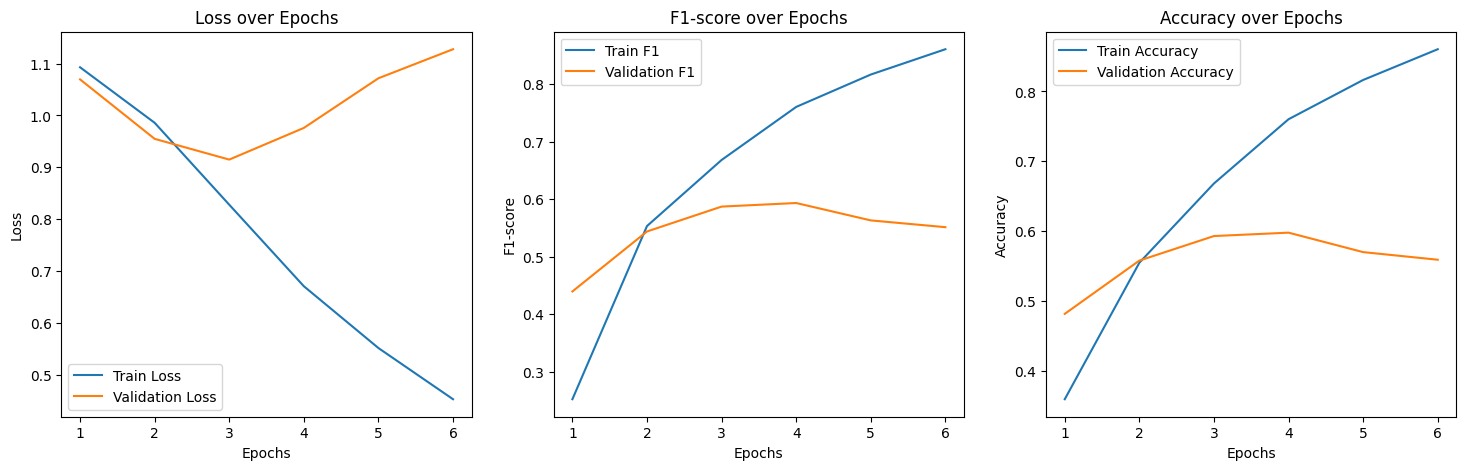


Resultados de la evaluación:
Accuracy:  0.5952
Precision: 0.5892
Recall:    0.5952
F1 Score:  0.5854

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.51      0.56       242
           1       0.62      0.76      0.68       336
           2       0.48      0.38      0.43       168

    accuracy                           0.60       746
   macro avg       0.57      0.55      0.56       746
weighted avg       0.59      0.60      0.59       746



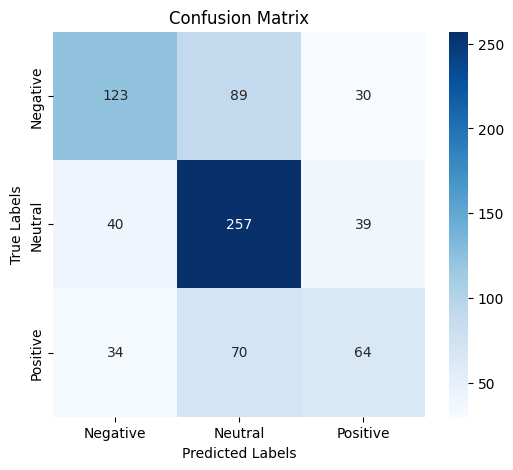

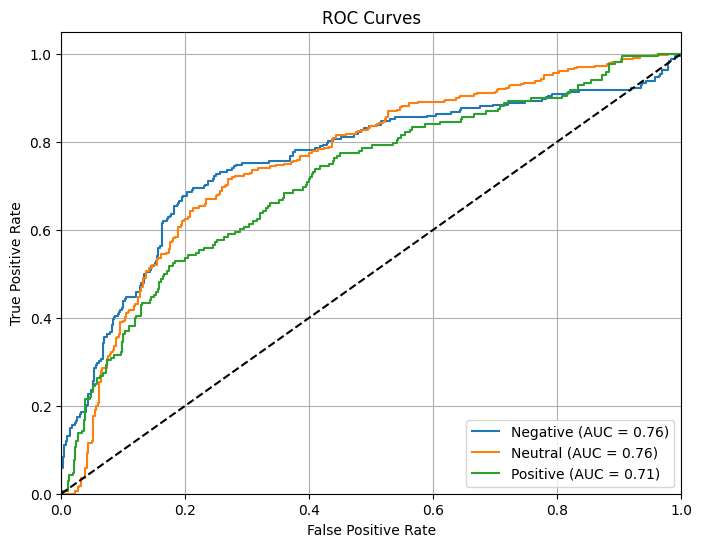

In [36]:
# Competición de MELD
best_model_name_MELD, best_model_MELD, all_results_MELD = run_model_competition(competition_dict_MELD)

# Se calcula su máximo de largo por texto
max_len_best_MELD =  measure_max_len(tokenizers[best_model_name_MELD], [text_train_MELD, text_dev_MELD, text_test_MELD], 'MELD', best_model_name_MELD)

# Se encuentran sus mejores hiperparámetros
best_params_MELD = grid_search_hyperparameters(model_names[best_model_name_MELD], 
                                               tokenizers[best_model_name_MELD], 
                                               text_train_MELD, 
                                               features_train_MELD, 
                                               labels_train_MELD, 
                                               text_dev_MELD, 
                                               features_dev_MELD, 
                                               labels_dev_MELD, 
                                               max_len_best_MELD)
# Se generan los mejores datasets
train_dataset_best_MELD = SentimentDataset(text_train_MELD, features_train_MELD, labels_train_MELD, tokenizers[best_model_name_MELD], max_len_best_MELD)
dev_dataset_best_MELD = SentimentDataset(text_dev_MELD, features_dev_MELD, labels_dev_MELD, tokenizers[best_model_name_MELD], max_len_best_MELD)
test_dataset_best_MELD = SentimentDataset(text_test_MELD, features_test_MELD, labels_test_MELD, tokenizers[best_model_name_MELD], max_len_best_MELD)

# Se generan los mejores dataloaders
train_dataloader_best_MELD = DataLoader(train_dataset_best_MELD, batch_size = best_params_MELD['batch_size'], shuffle = True)
dev_dataloader_best_MELD = DataLoader(dev_dataset_best_MELD, batch_size = best_params_MELD['batch_size'])
test_dataloader_best_MELD = DataLoader(test_dataset_best_MELD, batch_size = best_params_MELD['batch_size'])

# Se entrena el modelo con los mejores hiperparámetros
device = 'cuda'
best_model_to_train_MELD = HybridTransformerClassifier(model_names[best_model_name_MELD], num_features = features_train_MELD.shape[1])

best_trained_model_MELD, _ = train_and_evaluate(best_model_to_train_MELD, 
                                                train_dataloader_best_MELD,
                                                dev_dataloader_best_MELD,
                                                labels_train_MELD,
                                                device = device, 
                                                epochs = best_params_MELD['epochs'],
                                                lr = best_params_MELD['learning_rate'],
                                                freeze_epochs = 1,
                                                patience = 2)

# Se predice con el mejor modelo para evaluar su rendimiento
y_pred_best_MELD, y_prob_best_MELD = predict(best_trained_model_MELD, test_dataloader_best_MELD, device)
evaluate_predictions(labels_test_MELD, y_pred_best_MELD, y_prob_best_MELD, labels_names = ['Negative', 'Neutral', 'Positive'])

# Se calculan las predicciones de train y dev para el mejor modelo en MELD
_, y_prob_train_MELD = predict(best_trained_model_MELD, train_dataloader_best_MELD, device)
_, y_prob_dev_MELD = predict(best_trained_model_MELD, dev_dataloader_best_MELD, device)

# Se listan los paths originales y finales y las predicciones de MELD
list_original_paths_MELD = ['/kaggle/working/MELD_train.csv', '/kaggle/working/MELD_dev.csv', '/kaggle/working/MELD_test.csv']
list_output_paths_MELD = ['MELD_train_with_preds.csv', 'MELD_dev_with_preds.csv', 'MELD_test_with_preds.csv']
predictions_MELD = [y_prob_train_MELD, y_prob_dev_MELD, y_prob_best_MELD]

# Se guardan las predicciones y el mejor modelo
save_preds_and_best_model(list_original_paths_MELD, list_output_paths_MELD, "best_model_MELD.pth", predictions_MELD, best_trained_model_MELD)

Entrenando el modelo bertweet
New best model saved with F1: 0.4808
New best model saved with F1: 0.6175
New best model saved with F1: 0.6338
New best model saved with F1: 0.6359
bertweet - ACC: 0.6379 - F1-macro: 0.5994

Entrenando el modelo twitter-roberta
New best model saved with F1: 0.4158
New best model saved with F1: 0.5647
New best model saved with F1: 0.6192
Early stopping triggered.
twitter-roberta - ACC: 0.6149 - F1-macro: 0.5798


Mejor modelo: bertweet con F1-macro: 0.5994
Max token length for MOSEI: 163
Model bertweet max token length: 128

 Combinación a probar: batch = 32, epochs = 8, LR = 2e-05
New best model saved with F1: 0.2037
New best model saved with F1: 0.3455
New best model saved with F1: 0.6218
Early stopping triggered.

 Combinación a probar: batch = 32, epochs = 8, LR = 1e-05
New best model saved with F1: 0.2024
New best model saved with F1: 0.4657
New best model saved with F1: 0.6292
New best model saved with F1: 0.6347
New best model saved with F1: 0.6398
E

100%|██████████| 744/744 [02:34<00:00,  4.80it/s]


Train Loss: 5.9367, ACC: 0.3484, F1-score: 0.3432
Val Loss: 1.0421, ACC: 0.5295, F1-score: 0.4384
New best model saved with F1: 0.4384

 Epoch 2


100%|██████████| 744/744 [07:41<00:00,  1.61it/s]


Train Loss: 1.2496, ACC: 0.4544, F1-score: 0.4552
Val Loss: 0.8696, ACC: 0.6346, F1-score: 0.6203
New best model saved with F1: 0.6203

 Epoch 3


100%|██████████| 744/744 [07:41<00:00,  1.61it/s]


Train Loss: 0.8765, ACC: 0.6276, F1-score: 0.6279
Val Loss: 0.8420, ACC: 0.6264, F1-score: 0.6257
New best model saved with F1: 0.6257

 Epoch 4


100%|██████████| 744/744 [07:41<00:00,  1.61it/s]


Train Loss: 0.7322, ACC: 0.7193, F1-score: 0.7196
Val Loss: 0.8705, ACC: 0.6220, F1-score: 0.6278
New best model saved with F1: 0.6278

 Epoch 5


100%|██████████| 744/744 [07:41<00:00,  1.61it/s]


Train Loss: 0.5933, ACC: 0.7965, F1-score: 0.7967
Val Loss: 0.9452, ACC: 0.6379, F1-score: 0.6243

 Epoch 6


100%|██████████| 744/744 [07:41<00:00,  1.61it/s]


Train Loss: 0.4818, ACC: 0.8522, F1-score: 0.8523
Val Loss: 0.9903, ACC: 0.6302, F1-score: 0.6185
Early stopping triggered.


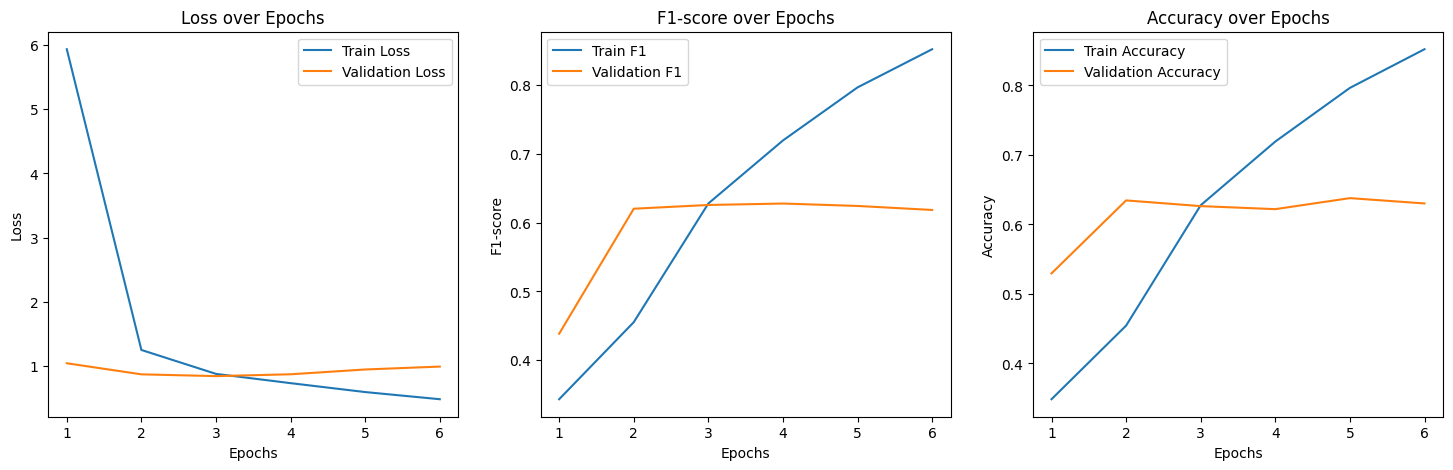


Resultados de la evaluación:
Accuracy:  0.6432
Precision: 0.6306
Recall:    0.6432
F1 Score:  0.6328

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65      1303
           1       0.44      0.33      0.38       989
           2       0.68      0.79      0.73      2254

    accuracy                           0.64      4546
   macro avg       0.60      0.58      0.59      4546
weighted avg       0.63      0.64      0.63      4546



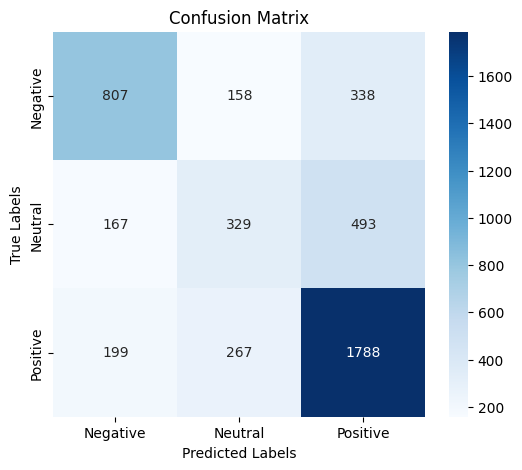

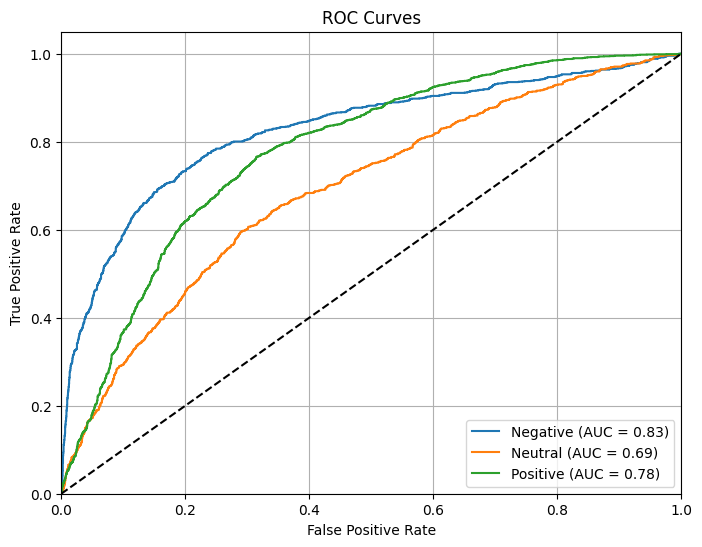

In [25]:
# Competición de MOSEI
best_model_name_MOSEI, best_model_MOSEI, all_results_MOSEI = run_model_competition(competition_dict_MOSEI)

# Se calcula su máximo de largo por texto
max_len_best_MOSEI =  measure_max_len(tokenizers['bertweet'], [text_train_MOSEI, text_dev_MOSEI, text_test_MOSEI], 'MOSEI', 'bertweet')

# Se encuentran sus mejores hiperparámetros
best_params_MOSEI = grid_search_hyperparameters(model_names[best_model_name_MOSEI], 
                                               tokenizers[best_model_name_MOSEI], 
                                               text_train_MOSEI, 
                                               features_train_MOSEI, 
                                               labels_train_MOSEI, 
                                               text_dev_MOSEI, 
                                               features_dev_MOSEI, 
                                               labels_dev_MOSEI, 
                                               max_len_best_MOSEI)

# Se generan los mejores datasets
train_dataset_best_MOSEI = SentimentDataset(text_train_MOSEI, features_train_MOSEI, labels_train_MOSEI, tokenizers['bertweet'], max_len_best_MOSEI)
dev_dataset_best_MOSEI = SentimentDataset(text_dev_MOSEI, features_dev_MOSEI, labels_dev_MOSEI, tokenizers['bertweet'], max_len_best_MOSEI)
test_dataset_best_MOSEI = SentimentDataset(text_test_MOSEI, features_test_MOSEI, labels_test_MOSEI, tokenizers['bertweet'], max_len_best_MOSEI)

# Se generan los mejores dataloaders
train_dataloader_best_MOSEI = DataLoader(train_dataset_best_MOSEI, batch_size = best_params_MOSEI['batch_size'], shuffle = True)
dev_dataloader_best_MOSEI = DataLoader(dev_dataset_best_MOSEI, batch_size = best_params_MOSEI['batch_size'])
test_dataloader_best_MOSEI = DataLoader(test_dataset_best_MOSEI, batch_size = best_params_MOSEI['batch_size'])

# Se entrena el modelo con los mejores hiperparámetros
device = 'cuda'
best_model_to_train_MOSEI = HybridTransformerClassifier(model_names[best_model_name_MOSEI], num_features = features_train_MOSEI.shape[1])

best_trained_model_MOSEI, _ = train_and_evaluate(best_model_to_train_MOSEI, 
                                                train_dataloader_best_MOSEI,
                                                dev_dataloader_best_MOSEI,
                                                labels_train_MOSEI,
                                                device = device, 
                                                epochs = best_params_MOSEI['epochs'],
                                                lr = best_params_MOSEI['learning_rate'],
                                                freeze_epochs = 1,
                                                patience = 2)

# Se predice con el mejor modelo para evaluar su rendimiento
y_pred_best_MOSEI, y_prob_best_MOSEI = predict(best_trained_model_MOSEI, test_dataloader_best_MOSEI, device)
evaluate_predictions(labels_test_MOSEI, y_pred_best_MOSEI, y_prob_best_MOSEI, labels_names = ['Negative', 'Neutral', 'Positive'])

# Se calculan las predicciones de train y dev para el mejor modelo en MOSEI
_, y_prob_train_MOSEI = predict(best_trained_model_MOSEI, train_dataloader_best_MOSEI, device)
_, y_prob_dev_MOSEI = predict(best_trained_model_MOSEI, dev_dataloader_best_MOSEI, device)

# Se listan los paths originales y finales y las predicciones de MOSEI
list_original_paths_MOSEI = ['/kaggle/working/MOSEI_train.csv', '/kaggle/working/MOSEI_dev.csv', '/kaggle/working/MOSEI_test.csv']
list_output_paths_MOSEI = ['MOSEI_train_with_preds.csv', 'MOSEI_dev_with_preds.csv', 'MOSEI_test_with_preds.csv']
predictions_MOSEI = [y_prob_train_MOSEI, y_prob_dev_MOSEI, y_prob_best_MOSEI]

# Se guardan las predicciones y el mejor modelo
save_preds_and_best_model(list_original_paths_MOSEI, list_output_paths_MOSEI, "best_model_MOSEI.pth", predictions_MOSEI, best_trained_model_MOSEI)

# Emotion recognition en Audio

## Carga de los CSVs

In [2]:
#from utils import *

# Para MELD
df_train_audio_MELD = pd.read_csv("/kaggle/working/MELD_train_with_preds.csv")
df_dev_audio_MELD = pd.read_csv("/kaggle/working/MELD_dev_with_preds.csv")
df_test_audio_MELD = pd.read_csv("/kaggle/working/MELD_test_with_preds.csv")

# Para MOSEI
df_train_audio_MOSEI = pd.read_csv("/kaggle/working/MOSEI_train_with_preds.csv")
df_dev_audio_MOSEI = pd.read_csv("/kaggle/working/MOSEI_dev_with_preds.csv")
df_test_audio_MOSEI = pd.read_csv("/kaggle/working/MOSEI_test_with_preds.csv")

## Creación de los Espectrogramas de Mel

In [3]:
# Se crean los Espectrogramas de Mel para
# MELD
#df_train_mel_MOSEI = process_in_chunks(df_train_audio_MOSEI, 'mel_spectrograms/mosei_train/', 'MOSEI_train_spectrograms.csv', chunk_size = 5000)
df_train_mel_MELD = load_df_or_create_mel_spectrograms(df_train_audio_MELD, 'mel_spectrograms/meld_train/', 'MELD_train_spectrograms.csv')
df_dev_mel_MELD = load_df_or_create_mel_spectrograms(df_dev_audio_MELD, 'mel_spectrograms/meld_dev/', 'MELD_dev_spectrograms.csv')
df_test_mel_MELD = load_df_or_create_mel_spectrograms(df_test_audio_MELD, 'mel_spectrograms/meld_test/', 'MELD_test_spectrograms.csv')

# MOSEI
df_train_mel_MOSEI = load_df_or_create_mel_spectrograms(df_train_audio_MOSEI, 'mel_spectrograms/mosei_train/', 'MOSEI_train_spectrograms.csv')
df_dev_mel_MOSEI = load_df_or_create_mel_spectrograms(df_dev_audio_MOSEI, 'mel_spectrograms/mosei_dev/', 'MOSEI_dev_spectrograms.csv')
df_test_mel_MOSEI = load_df_or_create_mel_spectrograms(df_test_audio_MOSEI, 'mel_spectrograms/mosei_test/', 'MOSEI_test_spectrograms.csv')

Cargando CSV procesado desde /kaggle/working/MELD_train_spectrograms.csv...
Cargando CSV procesado desde /kaggle/working/MELD_dev_spectrograms.csv...
Cargando CSV procesado desde /kaggle/working/MELD_test_spectrograms.csv...
Cargando CSV procesado desde /kaggle/working/MOSEI_train_spectrograms.csv...
Cargando CSV procesado desde /kaggle/working/MOSEI_dev_spectrograms.csv...
Cargando CSV procesado desde /kaggle/working/MOSEI_test_spectrograms.csv...


In [4]:
# Se actualizan los paths de cada espectrograma de Mel al del nuevo dataset de Kaggle
# MELD
df_train_mel_MELD['mel_path'] = df_train_mel_MELD['mel_path'].apply(lambda x: '/kaggle/input/spectrograms/final_specs/meld_train' + x[x.rfind('/dia'):])
df_dev_mel_MELD['mel_path'] = df_dev_mel_MELD['mel_path'].apply(lambda x: '/kaggle/input/spectrograms/final_specs/meld_dev' + x[x.rfind('/dia'):])
df_test_mel_MELD['mel_path'] = df_test_mel_MELD['mel_path'].apply(lambda x: '/kaggle/input/spectrograms/final_specs/meld_test' + x[x.rfind('/dia'):])

# MOSEI
df_train_mel_MOSEI['mel_path'] = df_train_mel_MOSEI['mel_path'].apply(lambda x: '/kaggle/input/spectrograms/final_specs/mosei_train/' + x.split('/')[-1])
df_dev_mel_MOSEI['mel_path'] = df_dev_mel_MOSEI['mel_path'].apply(lambda x: '/kaggle/input/spectrograms/final_specs/mosei_dev/' + x.split('/')[-1])
df_test_mel_MOSEI['mel_path'] = df_test_mel_MOSEI['mel_path'].apply(lambda x: '/kaggle/input/spectrograms/final_specs/mosei_test/' + x.split('/')[-1])

## Balanceo de Dataframes de Entrenamiento

In [5]:
# MELD
df_train_balanced_MELD = load_or_create_meld_augmented_df(df_train_mel_MELD)

Distribución original de clases en MELD:
Emotion
0    2293
1     511
2     613
3    6118
4    3116
5    1480
6    2751
Name: count, dtype: int64
Cargando archivo encontrado: /kaggle/working/MELD_train_audio_augmented.csv
Distribución final de clases en MELD:
Emotion
0    3116
1    3116
2    3116
3    3116
4    3116
5    3116
6    3116
Name: count, dtype: int64


In [6]:
# MOSEI
emotion_cols = ['happy', 'sad', 'anger', 'surprise', 'disgust', 'fear', 'neutral']
df_train_balanced_MOSEI = load_or_create_mosei_augmented_df(df_train_mel_MOSEI, emotion_cols)

Distribución original de emociones activas (umbral >= 0.2):
  happy: 9474
  sad: 7965
  anger: 7689
  surprise: 1468
  disgust: 5744
  fear: 4058
  neutral: 10264
Cargando archivo encontrado: /kaggle/working/MOSEI_train_audio_augmented.csv

Distribución final de emociones activas en el CSV:
  happy: 6158
  sad: 6285
  anger: 6308
  surprise: 5169
  disgust: 6366
  fear: 5656
  neutral: 5000


In [9]:
# MELD
df_train_balanced_MELD.to_csv('MELD_train_audio.csv', index = False)
df_dev_mel_MELD.to_csv('MELD_dev_audio.csv', index = False)
df_test_mel_MELD.to_csv('MELD_test_audio.csv', index = False)

# MOSEI
df_train_balanced_MOSEI.to_csv('MOSEI_train_audio.csv', index = False)
df_dev_mel_MOSEI.to_csv('MOSEI_dev_audio.csv', index = False)
df_test_mel_MOSEI.to_csv('MOSEI_test_audio.csv', index = False)

### Feature Engineering para Audio

In [7]:
df_train_FE_MELD = load_df_or_feature_engineering(df_train_balanced_MELD, 'MELD_train_FE.csv')
df_dev_FE_MELD = load_df_or_feature_engineering(df_dev_mel_MELD, 'MELD_dev_FE.csv')
df_test_FE_MELD = load_df_or_feature_engineering(df_test_mel_MELD, 'MELD_test_FE.csv')

Cargando CSV procesado desde /kaggle/working/MELD_train_FE.csv...
Cargando CSV procesado desde /kaggle/working/MELD_dev_FE.csv...
Cargando CSV procesado desde /kaggle/working/MELD_test_FE.csv...


In [8]:
df_train_FE_MOSEI = load_df_or_feature_engineering(df_train_balanced_MOSEI, 'MOSEI_train_FE.csv')
df_dev_FE_MOSEI = load_df_or_feature_engineering(df_dev_mel_MOSEI, 'MOSEI_dev_FE.csv')
df_test_FE_MOSEI = load_df_or_feature_engineering(df_test_mel_MOSEI, 'MOSEI_test_FE.csv')

Cargando CSV procesado desde /kaggle/working/MOSEI_train_FE.csv...
Cargando CSV procesado desde /kaggle/working/MOSEI_dev_FE.csv...
Cargando CSV procesado desde /kaggle/working/MOSEI_test_FE.csv...


### Generación de los Datasets

In [9]:
features_audio_MELD = ['duration',  
                       'dialogue_id_norm', 
                       'utterance_id_norm', 
                       'season_norm',
                       'polarity',
                       'subjectivity', 
                       'rms_energy',
                       'zero_crossing_rate',
                       'flatness',
                       'rolloff',
                       'mfcc1',
                       'mfcc2',
                       'pred_negative', 
                       'pred_neutral',
                       'pred_positive']
train_audio_dataset_MELD = EmotionDataset(df_train_FE_MELD, extra_features_cols = features_audio_MELD, label_cols = 'Emotion', multi_label = False)
dev_audio_dataset_MELD = EmotionDataset(df_dev_FE_MELD, extra_features_cols = features_audio_MELD, label_cols = 'Emotion', multi_label = False)
test_audio_dataset_MELD = EmotionDataset(df_test_FE_MELD, extra_features_cols = features_audio_MELD, label_cols = 'Emotion', multi_label = False)


features_audio_MOSEI = ['start_time', 
                        'end_time', 
                        'video_encoded', 
                        'duration', 
                        'intensity', 
                        'dominant_emotion', 
                        'positive_emotions', 
                        'polarity',
                        'subjectivity',
                        'rms_energy',
                        'zero_crossing_rate',
                        'flatness',
                        'rolloff',
                        'mfcc1',
                        'mfcc2',
                        'pred_negative', 
                        'pred_neutral',
                        'pred_positive']
label_cols_MOSEI = ['happy',
                    'sad',
                    'anger',
                    'surprise',
                    'disgust',
                    'fear',
                    'neutral']
train_audio_dataset_MOSEI = EmotionDataset(df_train_FE_MOSEI, extra_features_cols = features_audio_MOSEI, label_cols = label_cols_MOSEI, multi_label = True)
dev_audio_dataset_MOSEI = EmotionDataset(df_dev_FE_MOSEI, extra_features_cols = features_audio_MOSEI, label_cols = label_cols_MOSEI, multi_label = True)
test_audio_dataset_MOSEI = EmotionDataset(df_test_FE_MOSEI, extra_features_cols = features_audio_MOSEI, label_cols = label_cols_MOSEI, multi_label = True)

### Creación de los DataLoaders de Audio

In [10]:
# MELD
train_audio_dataloader_MELD = DataLoader(train_audio_dataset_MELD, batch_size = 32, shuffle = True, num_workers = 4)
dev_audio_dataloader_MELD = DataLoader(dev_audio_dataset_MELD, batch_size = 32, shuffle = False, num_workers = 4)
test_audio_dataloader_MELD = DataLoader(test_audio_dataset_MELD, batch_size = 32, shuffle = False, num_workers = 4)

# MOSEI
train_audio_dataloader_MOSEI = DataLoader(train_audio_dataset_MOSEI, batch_size = 32, shuffle = True, num_workers = 4)
dev_audio_dataloader_MOSEI = DataLoader(dev_audio_dataset_MOSEI, batch_size = 32, shuffle = False, num_workers = 4)
test_audio_dataloader_MOSEI = DataLoader(test_audio_dataset_MOSEI, batch_size = 32, shuffle = False, num_workers = 4)

## Entrenamiento en Audio

In [11]:
# Se definen los diccionarios de la competición de audio para
# MELD
audio_competition_dict_MELD = {
    "efficientnet_b0": [
        EmotionModel(backbone_name = 'efficientnet_b0', num_extra_features = len(features_audio_MELD)),
        train_audio_dataloader_MELD,
        dev_audio_dataloader_MELD
    ],
    "vgg16": [
        EmotionModel(backbone_name = 'vgg16', num_extra_features = len(features_audio_MELD)),
        train_audio_dataloader_MELD,
        dev_audio_dataloader_MELD
    ]    
}

# MOSEI
audio_competition_dict_MOSEI = {
    "efficientnet_b0": [
        EmotionModel(backbone_name = 'efficientnet_b0', num_extra_features = len(features_audio_MOSEI)),
        train_audio_dataloader_MOSEI,
        dev_audio_dataloader_MOSEI
    ],
    "vgg16": [
        EmotionModel(backbone_name = 'vgg16', num_extra_features = len(features_audio_MOSEI)),
        train_audio_dataloader_MOSEI,
        dev_audio_dataloader_MOSEI
    ]
}

In [16]:
# Competición de MELD
class_weights = compute_class_weight(class_weight = 'balanced',
                                     classes = np.unique(df_train_FE_MELD['Emotion']),
                                     y = df_train_FE_MELD['Emotion'])
best_audio_model_name_MELD, best_audio_model_MELD, all_audio_results_MELD = run_audio_model_competition(audio_competition_dict_MELD, class_weights, epochs = 3)

Entrenando modelo efficientnet_b0...
New best model saved with F1: 0.1883
New best model saved with F1: 0.2137
New best model saved with F1: 0.2296
efficientnet_b0 - F1-Score: 0.2296

Entrenando modelo vgg16...
New best model saved with F1: 0.1408
New best model saved with F1: 0.1922
vgg16 - F1-Score: 0.1922


Mejor modelo: efficientnet_b0 con F1-score: 0.2296


In [17]:
# Se encuentran sus mejores hiperparámetros
best_audio_params_MELD = grid_search_audio_hyperparameters(best_audio_model_name_MELD,
                                                           train_audio_dataset_MELD, 
                                                           dev_audio_dataset_MELD, 
                                                           class_weights,
                                                           len(features_audio_MELD))


 Combinación a probar: batch = 32, epochs = 8, LR = 0.0001
New best model saved with F1: 0.1697
New best model saved with F1: 0.1827
Early stopping triggered.

 Combinación a probar: batch = 32, epochs = 8, LR = 5e-05
New best model saved with F1: 0.1299
New best model saved with F1: 0.1587
New best model saved with F1: 0.1601
New best model saved with F1: 0.1734
New best model saved with F1: 0.1775
New best model saved with F1: 0.1781

 Combinación a probar: batch = 32, epochs = 10, LR = 0.0001
New best model saved with F1: 0.1738
Early stopping triggered.

 Combinación a probar: batch = 32, epochs = 10, LR = 5e-05
New best model saved with F1: 0.1630
New best model saved with F1: 0.1669
Early stopping triggered.

 Combinación a probar: batch = 64, epochs = 8, LR = 0.0001
New best model saved with F1: 0.1649
New best model saved with F1: 0.1876
Early stopping triggered.

 Combinación a probar: batch = 64, epochs = 8, LR = 5e-05
New best model saved with F1: 0.1585
New best model save


 Epoch 0
Train Loss: 1.3732, ACC: 0.2056 F1-score: 0.1949
Val Loss: 1.2641, ACC: 0.3034 F1-score: 0.1246
New best model saved with F1: 0.1246

 Epoch 1
Train Loss: 1.1597, ACC: 0.2745 F1-score: 0.2553
Val Loss: 1.1662, ACC: 0.2973 F1-score: 0.1389
New best model saved with F1: 0.1389

 Epoch 2
Train Loss: 1.0691, ACC: 0.3110 F1-score: 0.2997
Val Loss: 1.1549, ACC: 0.3604 F1-score: 0.1891
New best model saved with F1: 0.1891

 Epoch 3
Train Loss: 1.0286, ACC: 0.3365 F1-score: 0.3277
Val Loss: 1.1544, ACC: 0.3495 F1-score: 0.2006
New best model saved with F1: 0.2006

 Epoch 4
Train Loss: 1.0082, ACC: 0.3449 F1-score: 0.3389
Val Loss: 1.1513, ACC: 0.3495 F1-score: 0.2050
New best model saved with F1: 0.2050

 Epoch 5
Train Loss: 0.9963, ACC: 0.3501 F1-score: 0.3444
Val Loss: 1.1514, ACC: 0.3362 F1-score: 0.1956

 Epoch 6
Train Loss: 0.9938, ACC: 0.3504 F1-score: 0.3457
Val Loss: 1.1433, ACC: 0.3604 F1-score: 0.2017
Early stopping triggered.


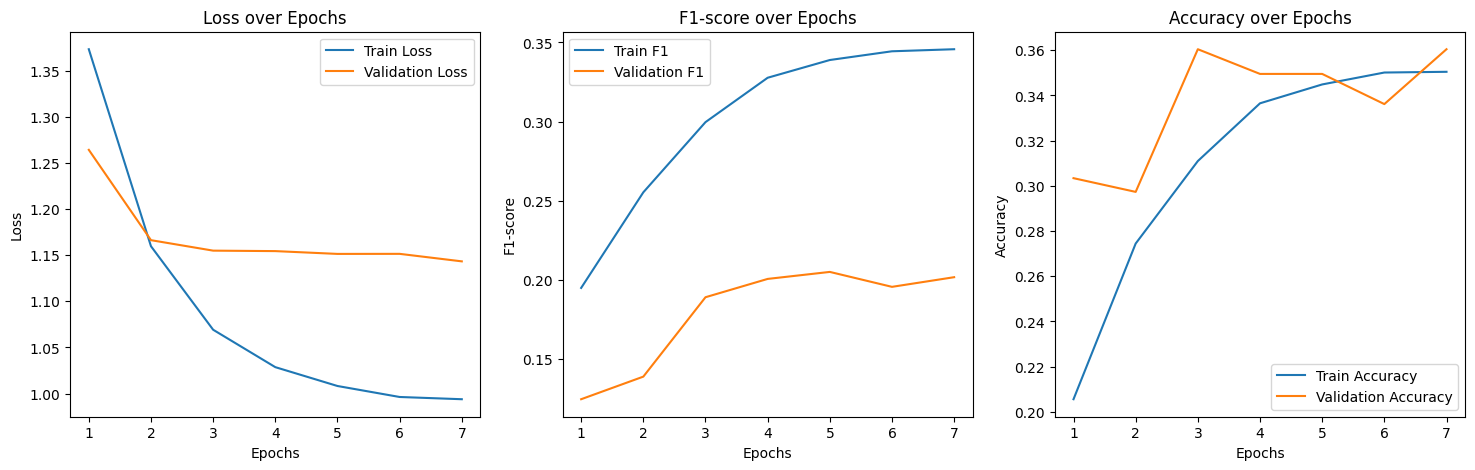

In [20]:
# Se generan los mejores dataloaders
torch.cuda.empty_cache()
train_audio_dataloader_best_MELD = DataLoader(train_audio_dataset_MELD, batch_size = best_audio_params_MELD['batch_size'], shuffle = True, num_workers = 4)
dev_audio_dataloader_best_MELD = DataLoader(dev_audio_dataset_MELD, batch_size = best_audio_params_MELD['batch_size'], shuffle = False, num_workers = 4)
test_audio_dataloader_best_MELD = DataLoader(test_audio_dataset_MELD, batch_size = best_audio_params_MELD['batch_size'], shuffle = False, num_workers = 4)

# Se entrena el modelo con los mejores hiperparámetros
device = 'cuda'
best_audio_model_to_train_MELD =  EmotionModel(backbone_name = best_audio_model_name_MELD, 
                                               num_extra_features = len(features_audio_MELD))

best_audio_trained_model_MELD, _ = train_and_evaluate_audio(best_audio_model_to_train_MELD,
                                                            train_audio_dataloader_best_MELD,
                                                            dev_audio_dataloader_best_MELD,
                                                            class_weights,
                                                            freeze_epochs = 4,
                                                            num_epochs = best_audio_params_MELD['epochs'],
                                                            lr = best_audio_params_MELD['learning_rate'])


Resultados de la evaluación:
Accuracy:  0.3874
Precision: 0.3490
Recall:    0.3874
F1 Score:  0.3573

Classification Report:
              precision    recall  f1-score   support

       anger       0.36      0.23      0.28        95
     disgust       0.00      0.00      0.00        22
        fear       0.00      0.00      0.00        27
         joy       0.23      0.36      0.28       133
     neutral       0.52      0.62      0.57       336
     sadness       0.17      0.02      0.03        58
    surprise       0.14      0.13      0.14        75

    accuracy                           0.39       746
   macro avg       0.20      0.19      0.19       746
weighted avg       0.35      0.39      0.36       746



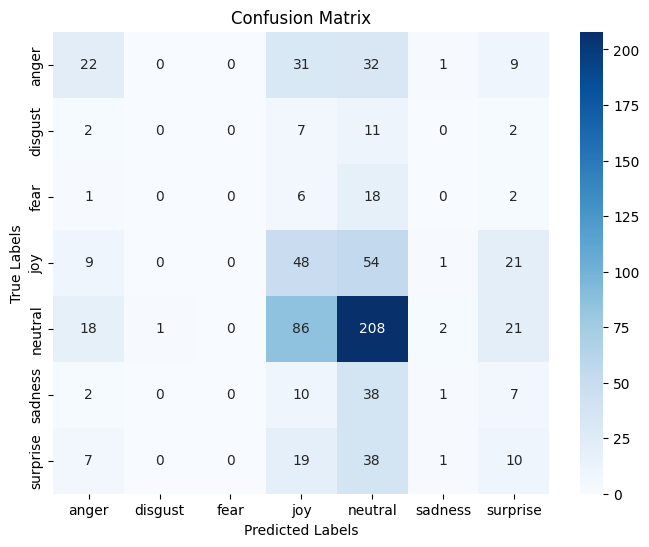

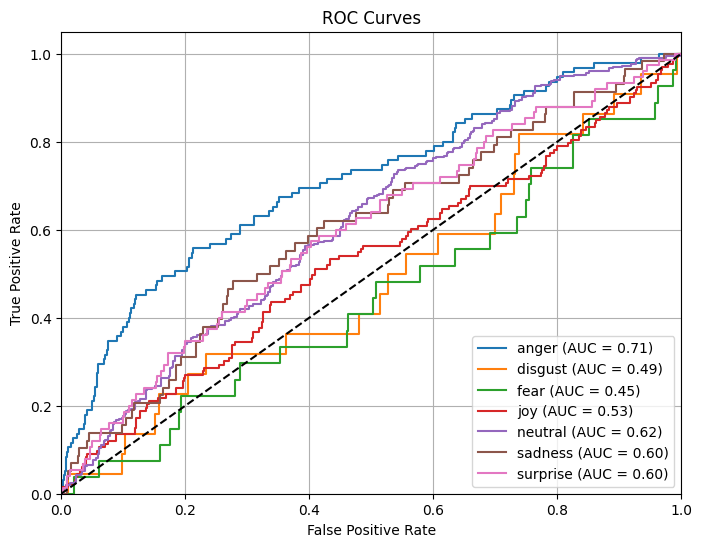

In [22]:
# Se predice con el mejor modelo para evaluar su rendimiento
y_pred_best_audio_MELD, y_prob_best_audio_MELD = predict_audio(best_audio_trained_model_MELD, test_audio_dataloader_best_MELD, device)
evaluate_audio_predictions(df_test_FE_MELD['Emotion'], y_pred_best_audio_MELD, y_prob_best_audio_MELD, ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise'])

# Se calculan las predicciones de train y dev para el mejor modelo en MELD
_, y_prob_audio_train_MELD = predict_audio(best_audio_trained_model_MELD, train_audio_dataloader_best_MELD, device)
_, y_prob_audio_dev_MELD = predict_audio(best_audio_trained_model_MELD, dev_audio_dataloader_best_MELD, device)

# Se listan los paths originales y finales y las predicciones de MELD
list_audio_original_paths_MELD = ['/kaggle/working/MELD_train_audio.csv', '/kaggle/working/MELD_dev_audio.csv', '/kaggle/working/MELD_test_audio.csv']
list_audio_output_paths_MELD = ['MELD_train_with_audio_preds.csv', 'MELD_dev_with_audio_preds.csv', 'MELD_test_with_audio_preds.csv']
audio_predictions_MELD = [y_prob_audio_train_MELD, y_prob_audio_dev_MELD, y_prob_best_audio_MELD]

# Se guardan las predicciones y el mejor modelo
save_preds_and_best_model(list_audio_original_paths_MELD, list_audio_output_paths_MELD, "best_audio_model_MELD.pth", audio_predictions_MELD, best_audio_trained_model_MELD)

MOSEI

In [13]:
# Competición de MOSEI
emotion_cols = ['happy', 'sad', 'anger', 'surprise', 'disgust', 'fear', 'neutral']
Y = (df_train_FE_MOSEI[emotion_cols] > 0.2).astype(int)

# Calculamos los pesos de las clases
total = len(Y)
pos_counts = Y.sum()
neg_counts = total - pos_counts
pos_weights = (neg_counts / pos_counts).values
best_audio_model_name_MOSEI, best_audio_model_MOSEI, all_audio_results_MOSEI = run_audio_model_competition(audio_competition_dict_MOSEI, pos_weights, epochs = 3, multilabel = True)

Entrenando modelo efficientnet_b0...
New best model saved with F1: 0.1841
New best model saved with F1: 0.1999
New best model saved with F1: 0.2150
efficientnet_b0 - F1-Score: 0.2150

Entrenando modelo vgg16...
New best model saved with F1: 0.1824
New best model saved with F1: 0.1852
New best model saved with F1: 0.1863
vgg16 - F1-Score: 0.1863


Mejor modelo: efficientnet_b0 con F1-score: 0.2150


In [ ]:
# Se encuentran sus mejores hiperparámetros
best_audio_params_MOSEI = grid_search_audio_hyperparameters(best_audio_model_name_MOSEI,
                                                            train_audio_dataset_MOSEI, 
                                                            dev_audio_dataset_MOSEI, 
                                                            pos_weights,
                                                            len(features_audio_MOSEI),
                                                            multilabel = True)


 Combinación a probar: batch = 32, epochs = 8, LR = 0.0001
New best model saved with F1: 0.1846
New best model saved with F1: 0.1963
New best model saved with F1: 0.2066
New best model saved with F1: 0.2264
New best model saved with F1: 0.2289
New best model saved with F1: 0.2377
New best model saved with F1: 0.2378

 Combinación a probar: batch = 32, epochs = 8, LR = 5e-05
New best model saved with F1: 0.1833
New best model saved with F1: 0.1866
New best model saved with F1: 0.1871
New best model saved with F1: 0.1929
New best model saved with F1: 0.1936
New best model saved with F1: 0.1947

 Combinación a probar: batch = 32, epochs = 10, LR = 0.0001
New best model saved with F1: 0.1837
New best model saved with F1: 0.2152
New best model saved with F1: 0.2170
New best model saved with F1: 0.2443
Early stopping triggered.

 Combinación a probar: batch = 32, epochs = 10, LR = 5e-05
New best model saved with F1: 0.1831
New best model saved with F1: 0.1866
New best model saved with F1: 0

In [24]:
best_audio_params_MOSEI = {'batch_size': 32,
                         'epochs': 10,
                         'learning_rate': 0.0001,
                         'best_f1': 0.2410}
best_audio_model_name_MOSEI = 'efficientnet_b0'
emotion_cols = ['happy', 'sad', 'anger', 'surprise', 'disgust', 'fear', 'neutral']
Y = (df_train_balanced_MOSEI[emotion_cols] > 0.2).astype(int)

# Calculamos los pesos de las clases
total = len(Y)
pos_counts = Y.sum()
neg_counts = total - pos_counts
pos_weights = (neg_counts / pos_counts).values


 Epoch 0
Train Loss: 1.1236, ACC: 0.1268, F1-score: 0.1457
Val Loss: 1.1889, ACC: 0.1674, F1-score: 0.1845
New best model saved with F1: 0.1845

 Epoch 1
Train Loss: 1.0114, ACC: 0.2655, F1-score: 0.1684
Val Loss: 1.2420, ACC: 0.3471, F1-score: 0.2010
New best model saved with F1: 0.2010

 Epoch 2
Train Loss: 0.9039, ACC: 0.3708, F1-score: 0.1965
Val Loss: 1.2308, ACC: 0.3887, F1-score: 0.2104
New best model saved with F1: 0.2104

 Epoch 3
Train Loss: 0.8600, ACC: 0.4288, F1-score: 0.2172
Val Loss: 1.2519, ACC: 0.4313, F1-score: 0.2184
New best model saved with F1: 0.2184

 Epoch 4
Train Loss: 0.8328, ACC: 0.4542, F1-score: 0.2290
Val Loss: 1.2391, ACC: 0.4534, F1-score: 0.2298
New best model saved with F1: 0.2298

 Epoch 5
Train Loss: 0.8261, ACC: 0.4638, F1-score: 0.2329
Val Loss: 1.2619, ACC: 0.5057, F1-score: 0.2430
New best model saved with F1: 0.2430

 Epoch 6
Train Loss: 0.8212, ACC: 0.4710, F1-score: 0.2369
Val Loss: 1.2486, ACC: 0.4776, F1-score: 0.2350

 Epoch 7
Train Loss: 

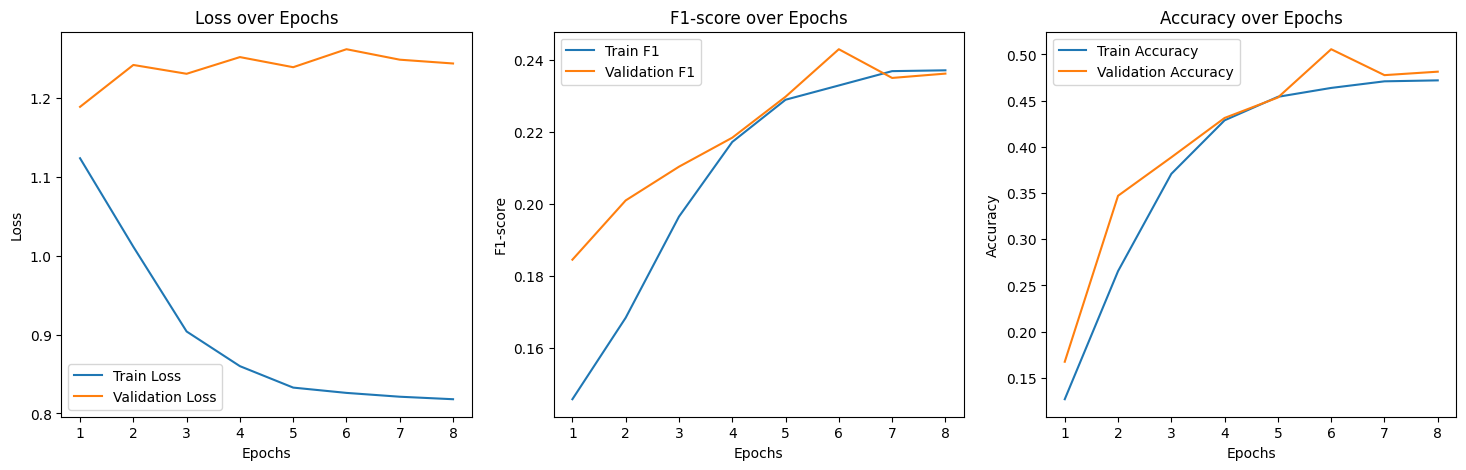

In [25]:
# Se generan los mejores dataloaders
torch.cuda.empty_cache()
train_audio_dataloader_best_MOSEI = DataLoader(train_audio_dataset_MOSEI, batch_size = best_audio_params_MOSEI['batch_size'], shuffle = True, num_workers = 4)
dev_audio_dataloader_best_MOSEI = DataLoader(dev_audio_dataset_MOSEI, batch_size = best_audio_params_MOSEI['batch_size'], shuffle = False, num_workers = 4)
test_audio_dataloader_best_MOSEI = DataLoader(test_audio_dataset_MOSEI, batch_size = best_audio_params_MOSEI['batch_size'], shuffle = False, num_workers = 4)

# Se entrena el modelo con los mejores hiperparámetros
device = 'cuda'
best_audio_model_to_train_MOSEI =  EmotionModel(backbone_name = best_audio_model_name_MOSEI, 
                                                num_extra_features = len(features_audio_MOSEI))

best_audio_trained_model_MOSEI, _ = train_and_evaluate_audio(best_audio_model_to_train_MOSEI,
                                                             train_audio_dataloader_best_MOSEI,
                                                             dev_audio_dataloader_best_MOSEI,
                                                             pos_weights,
                                                             freeze_epochs = 4,
                                                             num_epochs = best_audio_params_MOSEI['epochs'],
                                                             lr = best_audio_params_MOSEI['learning_rate'],
                                                             multilabel = True)


Resultados multilabel (por clase):
happy: ACC = 0.6234, Precision = 0.4725, Recall = 0.6767, F1 = 0.5565
sad: ACC = 0.6595, Precision = 0.2129, Recall = 0.6727, F1 = 0.3234
anger: ACC = 0.8883, Precision = 0.5905, Recall = 0.6317, F1 = 0.6104
surprise: ACC = 0.9201, Precision = 0.0311, Recall = 0.0656, F1 = 0.0422
disgust: ACC = 0.8768, Precision = 0.3649, Recall = 0.5261, F1 = 0.4309
fear: ACC = 0.8506, Precision = 0.1747, Recall = 0.2100, F1 = 0.1907
neutral: ACC = 0.7967, Precision = 0.2830, Recall = 0.2378, F1 = 0.2584

Classification Report:
              precision    recall  f1-score   support

       happy       0.47      0.68      0.56      1587
         sad       0.21      0.67      0.32       550
       anger       0.59      0.63      0.61       630
    surprise       0.03      0.07      0.04       122
     disgust       0.36      0.53      0.43       403
        fear       0.17      0.21      0.19       381
     neutral       0.28      0.24      0.26       677

   micro avg

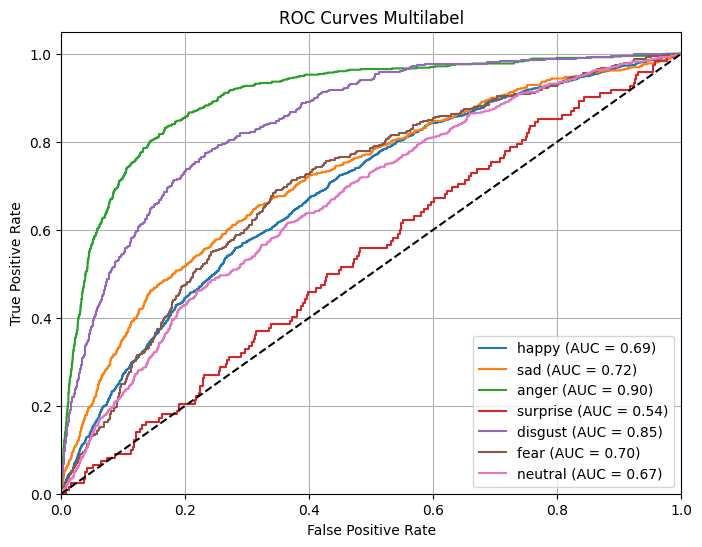

In [26]:
# Se predice con el mejor modelo para evaluar su rendimiento
y_pred_best_audio_MOSEI, y_prob_best_audio_MOSEI = predict_audio(best_audio_trained_model_MOSEI, test_audio_dataloader_best_MOSEI, device, multilabel = True)
evaluate_audio_predictions(df_test_FE_MOSEI[label_cols_MOSEI], y_pred_best_audio_MOSEI, y_prob_best_audio_MOSEI, label_cols_MOSEI, multilabel = True)

# Se calculan las predicciones de train y dev para el mejor modelo en MOSEI
_, y_prob_audio_train_MOSEI = predict_audio(best_audio_trained_model_MOSEI, train_audio_dataloader_best_MOSEI, device, multilabel = True)
_, y_prob_audio_dev_MOSEI = predict_audio(best_audio_trained_model_MOSEI, dev_audio_dataloader_best_MOSEI, device, multilabel = True)

# Se listan los paths originales y finales y las predicciones de MOSEI
list_audio_original_paths_MOSEI = ['/kaggle/working/MOSEI_train_audio.csv', '/kaggle/working/MOSEI_dev_audio.csv', '/kaggle/working/MOSEI_test_audio.csv']
list_audio_output_paths_MOSEI = ['MOSEI_train_with_audio_preds.csv', 'MOSEI_dev_with_audio_preds.csv', 'MOSEI_test_with_audio_preds.csv']
audio_predictions_MOSEI = [y_prob_audio_train_MOSEI, y_prob_audio_dev_MOSEI, y_prob_best_audio_MOSEI]

# Se guardan las predicciones y el mejor modelo
save_preds_and_best_model(list_audio_original_paths_MOSEI, list_audio_output_paths_MOSEI, "best_audio_model_MOSEI.pth", audio_predictions_MOSEI, best_audio_trained_model_MOSEI)

## Estudio de la aportación de las Predicciones de Sentimiento

### Para MELD

In [12]:
# Se definen los parametros para el entrenamiento extraidos del Grid Search
best_audio_params_MELD = {'batch_size': 64,
                         'epochs': 10,
                         'learning_rate': 5e-5}
best_audio_model_name_MELD = 'efficientnet_b0'

# Se definen los pesos de las clases
class_weights = compute_class_weight(class_weight = 'balanced',
                                     classes = np.unique(df_train_FE_MELD['Emotion']),
                                     y = df_train_FE_MELD['Emotion'])

In [13]:
# Se crean los nuevos Datasets sin las predicciones de Sentimiento
features_audio_MELD_wo_sent = ['duration',  
                               'dialogue_id_norm', 
                               'utterance_id_norm', 
                               'season_norm',
                               'polarity',
                               'subjectivity', 
                               'rms_energy',
                               'zero_crossing_rate',
                               'flatness',
                               'rolloff',
                               'mfcc1',
                               'mfcc2']
train_audio_dataset_MELD_wo_sent = EmotionDataset(df_train_FE_MELD, extra_features_cols = features_audio_MELD_wo_sent, label_cols = 'Emotion', multi_label = False)
dev_audio_dataset_MELD_wo_sent = EmotionDataset(df_dev_FE_MELD, extra_features_cols = features_audio_MELD_wo_sent, label_cols = 'Emotion', multi_label = False)
test_audio_dataset_MELD_wo_sent = EmotionDataset(df_test_FE_MELD, extra_features_cols = features_audio_MELD_wo_sent, label_cols = 'Emotion', multi_label = False)

# Se crean los nuevos DataLoaders
train_audio_dataloader_MELD_wo_sent = DataLoader(train_audio_dataset_MELD_wo_sent, batch_size = best_audio_params_MELD['batch_size'], shuffle = True, num_workers = 4)
dev_audio_dataloader_MELD_wo_sent = DataLoader(dev_audio_dataset_MELD_wo_sent, batch_size = best_audio_params_MELD['batch_size'], shuffle = False, num_workers = 4)
test_audio_dataloader_MELD_wo_sent = DataLoader(test_audio_dataset_MELD_wo_sent, batch_size = best_audio_params_MELD['batch_size'], shuffle = False, num_workers = 4)


 Epoch 0
Train Loss: 1.3704, ACC: 0.1940, F1-score: 0.1899
Val Loss: 1.2648, ACC: 0.2767, F1-score: 0.0955
New best model saved with F1: 0.0955

 Epoch 1
Train Loss: 1.1720, ACC: 0.2632, F1-score: 0.2514
Val Loss: 1.1991, ACC: 0.2900, F1-score: 0.1570
New best model saved with F1: 0.1570

 Epoch 2
Train Loss: 1.1074, ACC: 0.2774, F1-score: 0.2685
Val Loss: 1.1842, ACC: 0.2597, F1-score: 0.1455

 Epoch 3
Train Loss: 1.0757, ACC: 0.2932, F1-score: 0.2865
Val Loss: 1.1779, ACC: 0.2464, F1-score: 0.1556
Early stopping triggered.


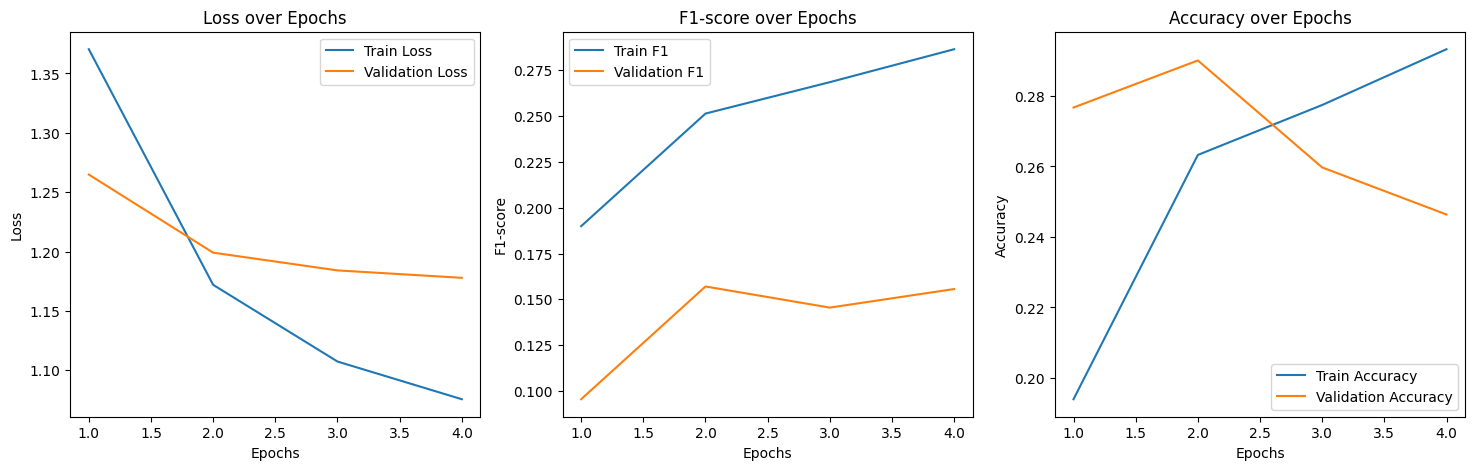

In [14]:
torch.cuda.empty_cache()

# Se entrena el modelo con los mejores hiperparámetros y sin las predicciones de Sentimiento
device = 'cuda'
best_audio_model_to_train_MELD_wo_sent =  EmotionModel(backbone_name = best_audio_model_name_MELD,
                                                       num_extra_features = len(features_audio_MELD_wo_sent))

best_audio_trained_model_MELD_wo_sent, _ = train_and_evaluate_audio(best_audio_model_to_train_MELD_wo_sent,
                                                                    train_audio_dataloader_MELD_wo_sent,
                                                                    dev_audio_dataloader_MELD_wo_sent,
                                                                    class_weights,
                                                                    freeze_epochs = 4,
                                                                    num_epochs = best_audio_params_MELD['epochs'],
                                                                    lr = best_audio_params_MELD['learning_rate'])


Resultados de la evaluación:
Accuracy:  0.2560
Precision: 0.2831
Recall:    0.2560
F1 Score:  0.2336

Classification Report:
              precision    recall  f1-score   support

       anger       0.20      0.21      0.21        95
     disgust       0.00      0.00      0.00        22
        fear       0.00      0.00      0.00        27
         joy       0.21      0.64      0.32       133
     neutral       0.47      0.24      0.32       336
     sadness       0.00      0.00      0.00        58
    surprise       0.08      0.07      0.07        75

    accuracy                           0.26       746
   macro avg       0.14      0.17      0.13       746
weighted avg       0.28      0.26      0.23       746



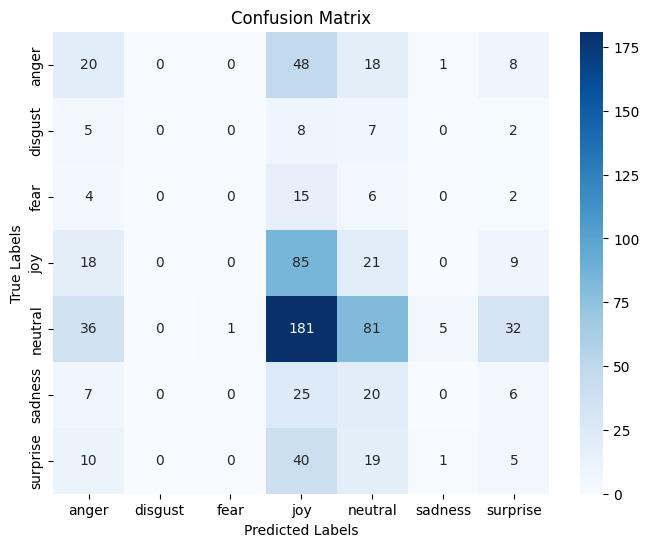

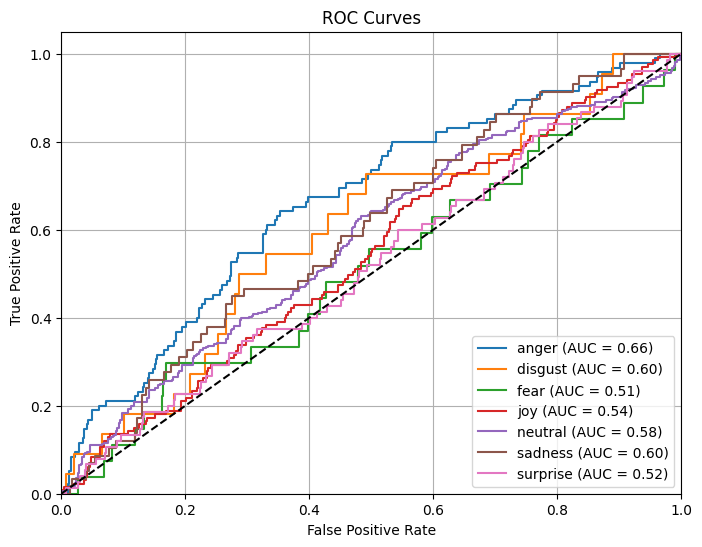

In [15]:
# Se predice con el modelo sin las predicciones de sentimeinto para evaluar su rendimiento
y_pred_best_audio_MELD_wo_sent, y_prob_best_audio_MELD_wo_sent = predict_audio(best_audio_trained_model_MELD_wo_sent, test_audio_dataloader_MELD_wo_sent, device)
evaluate_audio_predictions(df_test_FE_MELD['Emotion'], y_pred_best_audio_MELD_wo_sent, y_prob_best_audio_MELD_wo_sent, ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise'])

### Para MOSEI

In [16]:
# Se definen los parametros para el entrenamiento extraidos del Grid Search
best_audio_params_MOSEI = {'batch_size': 32,
                         'epochs': 10,
                         'learning_rate': 0.0001}
best_audio_model_name_MOSEI = 'efficientnet_b0'
emotion_cols = ['happy', 'sad', 'anger', 'surprise', 'disgust', 'fear', 'neutral']
Y = (df_train_balanced_MOSEI[emotion_cols] > 0.2).astype(int)

# Calculamos los pesos de las clases
total = len(Y)
pos_counts = Y.sum()
neg_counts = total - pos_counts
pos_weights = (neg_counts / pos_counts).values

In [17]:
# Se crean los nuevos Datasets sin las predicciones de Sentimiento
features_audio_MOSEI_wo_sent = ['start_time', 
                                'end_time', 
                                'video_encoded', 
                                'duration', 
                                'intensity', 
                                'dominant_emotion', 
                                'positive_emotions', 
                                'polarity',
                                'subjectivity',
                                'rms_energy',
                                'zero_crossing_rate',
                                'flatness',
                                'rolloff',
                                'mfcc1',
                                'mfcc2']

train_audio_dataset_MOSEI_wo_sent = EmotionDataset(df_train_FE_MOSEI, extra_features_cols = features_audio_MOSEI_wo_sent, label_cols = label_cols_MOSEI, multi_label = True)
dev_audio_dataset_MOSEI_wo_sent = EmotionDataset(df_dev_FE_MOSEI, extra_features_cols = features_audio_MOSEI_wo_sent, label_cols = label_cols_MOSEI, multi_label = True)
test_audio_dataset_MOSEI_wo_sent = EmotionDataset(df_test_FE_MOSEI, extra_features_cols = features_audio_MOSEI_wo_sent, label_cols = label_cols_MOSEI, multi_label = True)

# Se crean los nuevos DataLoaders
train_audio_dataloader_MOSEI_wo_sent = DataLoader(train_audio_dataset_MOSEI_wo_sent, batch_size = 32, shuffle = True, num_workers = 4)
dev_audio_dataloader_MOSEI_wo_sent = DataLoader(dev_audio_dataset_MOSEI_wo_sent, batch_size = 32, shuffle = False, num_workers = 4)
test_audio_dataloader_MOSEI_wo_sent = DataLoader(test_audio_dataset_MOSEI_wo_sent, batch_size = 32, shuffle = False, num_workers = 4)


 Epoch 0
Train Loss: 1.1267, ACC: 0.1257, F1-score: 0.1457
Val Loss: 1.1890, ACC: 0.1794, F1-score: 0.1854
New best model saved with F1: 0.1854

 Epoch 1
Train Loss: 1.0212, ACC: 0.2470, F1-score: 0.1641
Val Loss: 1.2353, ACC: 0.3119, F1-score: 0.1929
New best model saved with F1: 0.1929

 Epoch 2
Train Loss: 0.9152, ACC: 0.3524, F1-score: 0.1897
Val Loss: 1.2210, ACC: 0.4043, F1-score: 0.2120
New best model saved with F1: 0.2120

 Epoch 3
Train Loss: 0.8699, ACC: 0.4143, F1-score: 0.2104
Val Loss: 1.2222, ACC: 0.4695, F1-score: 0.2300
New best model saved with F1: 0.2300

 Epoch 4
Train Loss: 0.8422, ACC: 0.4421, F1-score: 0.2221
Val Loss: 1.2231, ACC: 0.4699, F1-score: 0.2313
New best model saved with F1: 0.2313

 Epoch 5
Train Loss: 0.8317, ACC: 0.4546, F1-score: 0.2283
Val Loss: 1.2146, ACC: 0.4748, F1-score: 0.2354
New best model saved with F1: 0.2354

 Epoch 6
Train Loss: 0.8278, ACC: 0.4614, F1-score: 0.2317
Val Loss: 1.2264, ACC: 0.4919, F1-score: 0.2373
New best model saved w

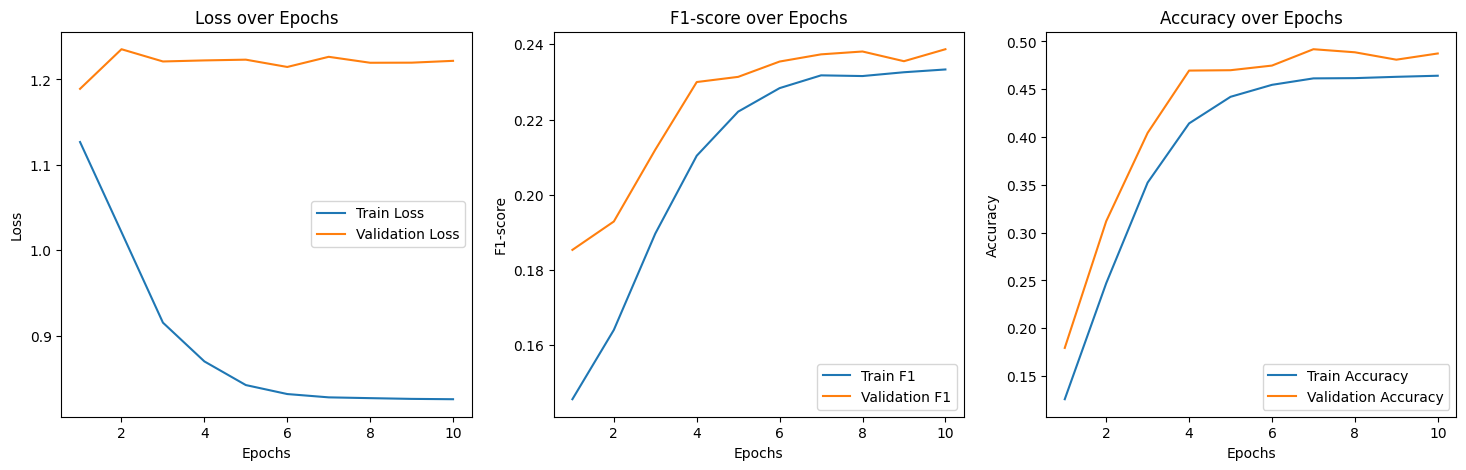

In [18]:
torch.cuda.empty_cache()

# Se entrena el modelo con los mejores hiperparámetros y sin las predicciones de Sentimiento
device = 'cuda'
best_audio_model_to_train_MOSEI_wo_sent =  EmotionModel(backbone_name = best_audio_model_name_MOSEI,
                                                        num_extra_features = len(features_audio_MOSEI_wo_sent))

best_audio_trained_model_MOSEI_wo_sent, _ = train_and_evaluate_audio(best_audio_model_to_train_MOSEI_wo_sent,
                                                                     train_audio_dataloader_MOSEI_wo_sent,
                                                                     dev_audio_dataloader_MOSEI_wo_sent,
                                                                     pos_weights,
                                                                     freeze_epochs = 4,
                                                                     num_epochs = best_audio_params_MOSEI['epochs'],
                                                                     lr = best_audio_params_MOSEI['learning_rate'],
                                                                     multilabel = True)


Resultados multilabel (por clase):
happy: ACC = 0.6599, Precision = 0.5133, Recall = 0.4991, F1 = 0.5061
sad: ACC = 0.6511, Precision = 0.2109, Recall = 0.6873, F1 = 0.3228
anger: ACC = 0.8898, Precision = 0.5920, Recall = 0.6587, F1 = 0.6236
surprise: ACC = 0.9241, Precision = 0.0593, Recall = 0.1230, F1 = 0.0800
disgust: ACC = 0.8792, Precision = 0.3719, Recall = 0.5261, F1 = 0.4358
fear: ACC = 0.8744, Precision = 0.2156, Recall = 0.1890, F1 = 0.2014
neutral: ACC = 0.7706, Precision = 0.2598, Recall = 0.2925, F1 = 0.2752

Classification Report:
              precision    recall  f1-score   support

       happy       0.51      0.50      0.51      1587
         sad       0.21      0.69      0.32       550
       anger       0.59      0.66      0.62       630
    surprise       0.06      0.12      0.08       122
     disgust       0.37      0.53      0.44       403
        fear       0.22      0.19      0.20       381
     neutral       0.26      0.29      0.28       677

   micro avg

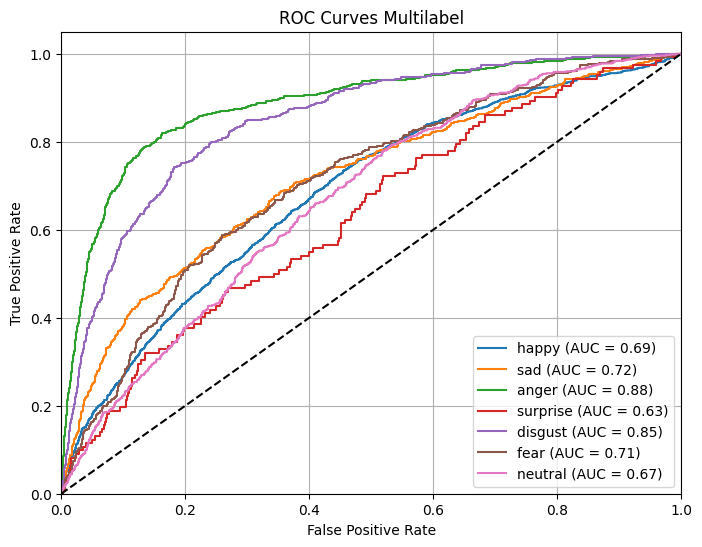

In [19]:
# Se predice con el modelo sin las predicciones de sentimeinto para evaluar su rendimiento
y_pred_best_audio_MOSEI_wo_sent, y_prob_best_audio_MOSEI_wo_sent = predict_audio(best_audio_trained_model_MOSEI_wo_sent, test_audio_dataloader_MOSEI_wo_sent, device, multilabel = True)
evaluate_audio_predictions(df_test_FE_MOSEI[label_cols_MOSEI], y_pred_best_audio_MOSEI_wo_sent, y_prob_best_audio_MOSEI_wo_sent, label_cols_MOSEI, multilabel = True)